In [253]:
import warnings; warnings.simplefilter('ignore')
from IPython.display import Image, HTML, display
import os
import pyLDAvis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from bs4 import BeautifulSoup
from dataclasses import dataclass, field
from datetime import datetime, date
from typing import Dict, DefaultDict, Set, List
import seaborn as sns
import plotly


pd.set_option("display.max_rows", None)
desired_width =300
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns', 10)

In [50]:
import so_ana_doc_worker.so_ana_reporting as so_ana_reporting
from sqlalchemy_models.db_deps import prod_db_deps_container, dict_to_es_key
import so_ana_management.management_utils as so_ana_mu
from so_ana_util import data_access

Pathes

In [227]:
BASE_OUTPUT=r'C:\Users\d91109\Documents\work\git\MBA\python\data\prod\2021_12_28_ddd\LDA'
TAG_LABEL='domain-driven-design'
NR_TOPICS=10

# Get db connection data

In [52]:
deps = prod_db_deps_container()

# Load relevant analysis objects

In order to access some job different from the latest one, browse the data frame "all_jobs" and replace flow_run_id by the desired value.

In [53]:
all_jobs = so_ana_reporting.ReportingDataAccess.load_all_job_data(deps.conn)
flow_run_id = all_jobs.sort_values('started_at_timest', ascending=False).iloc[0, :]['flow_run_id']

display(HTML(f'<h1>Last flow-run-id is: "{flow_run_id}""</h1>'))
display(HTML('<hr width="85%" align="left">'))
print()

all_steps = so_ana_reporting.ReportingDataAccess.load_all_step_data_for_flow_run_id(  connection=deps.conn,
                                                                                      flow_run_id=flow_run_id)
display(HTML(f'<h1>Steps for flow-run-id="{flow_run_id}"</h1>'))
display(all_steps.sort_index())

display(HTML('<hr width="85%" align="left">'))
print()
all_jobs

flow_name      flow_id                           flow_run_id flow_run_name                                      step_label  ...                                             result exit_code exit_msg                                     prev_step_lbls  modus
step                                                                                                                                ...                                                                                                                                
#1    so-analysis  so-analysis  ec9ef4aa-68c9-4fb0-a410-d95f52ae15c1  elite-numbat            dwnl_ddd_new_reporting_2021_12_28_#1  ...  {'step': '#1', 'label': 'dwnl_ddd_new_reportin...         0     None                                                 []   prod
#2    so-analysis  so-analysis  ec9ef4aa-68c9-4fb0-a410-d95f52ae15c1  elite-numbat            dwnl_ddd_new_reporting_2021_12_28_#2  ...  {'step': '#2', 'label': 'dwnl_ddd_new_reportin...         0     None             [dwnl_ddd_new_reporting_2021_12_28_#1]   prod
#3    so-analysis  so-analysis  ec9ef4aa-68c9-4fb0-a410-d95f52ae15c1  elite-numbat            dwnl_ddd_new_reporting_2021_12_28_#3  ...  {'step': '#3', 'label': 'dwnl_ddd_new_reportin...         0     None  [dwnl_ddd_new_reporting_2021_12_28_#1, dwnl_dd...   prod
#4    so-analysis  so-analysis  ec9ef4aa-68c9-4fb0-a410-d95f52ae15c1  elite-numbat                tok_ddd_new_reporting_2021_12_28  ...  {'step': '#4', 'label': 'tok_ddd_new_reporting...         0     None  [dwnl_ddd_new_reporting_2021_12_28_#1, dwnl_dd...   prod
#5    so-analysis  so-analysis  ec9ef4aa-68c9-4fb0-a410-d95f52ae15c1  elite-numbat               vect_ddd_new_reporting_2021_12_28  ...  {'step': '#5', 'label': 'vect_ddd_new_reportin...         0     None  [dwnl_ddd_new_reporting_2021_12_28_#1, dwnl_dd...   prod
#6    so-analysis  so-analysis  ec9ef4aa-68c9-4fb0-a410-d95f52ae15c1  elite-numbat            ml_opts_ddd_new_reporting_2021_12_28  ...  {'step': '#6', 'step_label': 'ml_opts_ddd_new_...         0     None  [dwnl_ddd_new_reporting_2021_12_28_#1, dwnl_dd...   prod
#7    so-analysis  so-analysis  e91bb0cb-e535-4419-9958-a2774cf42f36       new_ddd           rep_ddd_new_reporting_2021_12_28_v005  ...  [{'step': '#7', 'step_label': 'rep_ddd_new_rep...         0     None  [dwnl_ddd_new_reporting_2021_12_28_#1, dwnl_dd...   prod
#8    so-analysis  so-analysis  e91bb0cb-e535-4419-9958-a2774cf42f36       new_ddd  reporting_7e0a1c1d-9f1e-487d-8a68-d30fed2c4110  ...  [{'step': '#1', 'label': 'dwnl_ddd_new_reporti...         0     None  [dwnl_ddd_new_reporting_2021_12_28_#1, dwnl_dd...   prod

[8 rows x 13 columns]

description    flow_name                               flow_id                           flow_run_id                            flow_run_name  ...                                          flow_opts                                             result  \
0  Flows for anemic domain models (for testing an...  so-analysis  7966ade1-821c-499b-983b-651b07b2cab8  d52b3717-482d-4bdf-b456-3a4601ea12c9  test_run_anemic_domain_model_2021_12_28  ...  {'description': 'Flows for anemic domain model...  [{'step': '#1', 'label': 'dwnl_adm_new_reporti...   
1   Flows for domain-driven-design on stack-overflow  so-analysis  7966ade1-821c-499b-983b-651b07b2cab8  ec9ef4aa-68c9-4fb0-a410-d95f52ae15c1                             elite-numbat  ...  {'description': 'Flows for domain-driven-desig...  [{'step': '#1', 'label': 'dwnl_ddd_new_reporti...   
2          Flows for microservices on stack-overflow  so-analysis  68405eb8-1eb4-435c-a56f-435a982f75d8  da96a8dd-16fe-46c4-81a4-e3dd33c048eb            microservices_2021_12_28_v002  ...  {'description': 'Flows for microservices on st...  [{'step': '#1', 'label': 'dwnl_micro_new_repor...   
3  Flows for anemic domain models (for testing an...  so-analysis  63d0d52e-c5ef-401e-9514-b92e8ae5be14  be661e6b-0037-4073-ac04-28bf254f9b3d              re-test_anemic_domain_model  ...  {'description': 'Flows for anemic domain model...  [{'step': '#1', 'label': 'dwnl_adm_new_reporti...   
4  Flows for anemic domain models (for testing an...  so-analysis  b3f86a5b-9e79-45e4-bb94-1fb57c956edd  47b636b4-f26e-4a89-9397-40a92212a2c2        test_continue_anemic_domain_model  ...  {'description': 'Flows for anemic domain model...  [{'step': '#1', 'label': 'dwnl_adm_new_reporti...   
5  Flows for anemic domain models (for testing an...  so-analysis  6cd98ed5-f69d-448e-9022-f5b52afcf090  742d95e3-8dc4-43ae-9fc6-f150009ab6d7            test_anamic_domain_model_v002  ...  {'description': 'Flows for anemic domain model...  [{'step': '#1', 'label': 'dwnl_adm_new_reporti...   
6  Flows for anemic domain models (for testing an...  so-analysis  c5d8fab1-8283-47fc-8dc2-d33d3f827450  1947a65e-bc5d-41c6-90c0-b4606ab1a4a4          test_anemic_domain_service_v003  ...  {'description': 'Flows for anemic domain model...  [{'step': '#1', 'label': 'dwnl_adm_new_reporti...   
7          Flows for microservices on stack-overflow  so-analysis  b2567aa6-6265-4257-819e-4c29669c0ff3  86527cad-e1b3-4958-ab90-ee2eb199c1ca                            adept-malkoha  ...  {'description': 'Flows for microservices on st...  [{'step': '#1', 'label': 'dwnl_micro_new_repor...   
8   Flows for domain-driven-design on stack-overflow  so-analysis  b2567aa6-6265-4257-819e-4c29669c0ff3  e91bb0cb-e535-4419-9958-a2774cf42f36                                  new_ddd  ...  {'description': 'Flows for domain-driven-desig...  [{'step': '#1', 'label': 'dwnl_ddd_new_reporti...   

                                         step_2_info                               use_step_label use_step_step  
0  {'#1': {'step': '#1', 'label': 'dwnl_adm_new_r...                                         None          None  
1  {'#1': {'step': '#1', 'label': 'dwnl_ddd_new_r...                                         None          None  
2  {'#1': {'step': '#1', 'label': 'dwnl_micro_new...                                         None          None  
3  {'#1': {'step': '#1', 'label': 'dwnl_adm_new_r...                                         None          None  
4  {'#1': {'step': '#1', 'label': 'dwnl_adm_new_r...                                         None          None  
5  {'#1': {'step': '#1', 'label': 'dwnl_adm_new_r...                                         None          None  
6  {'#1': {'step': '#1', 'label': 'dwnl_adm_new_r...         ml_opts_adm_new_reporting_2021_12_28            #6  
7  {'#1': {'step': '#1', 'label': 'dwnl_micro_new...  ml_opts_micro_new_reporting_2021_12_28_v002            #6  
8  {'#1': {'step': '#1', 'label': 'dwnl_ddd_new_r...         ml_opts_ddd_new_reporti

# Load relevant artefacts for flow run (LDA visualisaton model, gensim dictionary [...]

In [54]:
all_steps.loc['#4']['step_label']

'tok_ddd_new_reporting_2021_12_28'

In [55]:
rep_data_access = so_ana_reporting.ReportingDataAccess(flow_run_id)
step_result_dict = rep_data_access.load_job_step_data(sqla_session=deps.session)
artefacts = rep_data_access.load_artefacts(deps.session)
wc_report_obj = so_ana_reporting.WCReports( deps_obj=deps,
                                            step='#3',
                                            step_label=step_result_dict['#3'].step_label
                                          )

artefact_dict = {(item['step'], item['artefact_key']): item for item in artefacts}

rep_wordcloud_artefact = artefact_dict[('#7', 'wordcloud')]
rep_LDAvis_artefact = artefact_dict[('#7', 'LDAvis')] 
lda_model_artefact = artefact_dict[('#6', 'LDA_model_data')] 
dict_artefact = artefact_dict[('#5', 'dictionary')] 

lda_model = so_ana_reporting.LDA_from_artefact(lda_model_artefact)
dictionary = so_ana_reporting.dictionary_from_artefact(dict_artefact)

# Word clouds

## Full Corpus

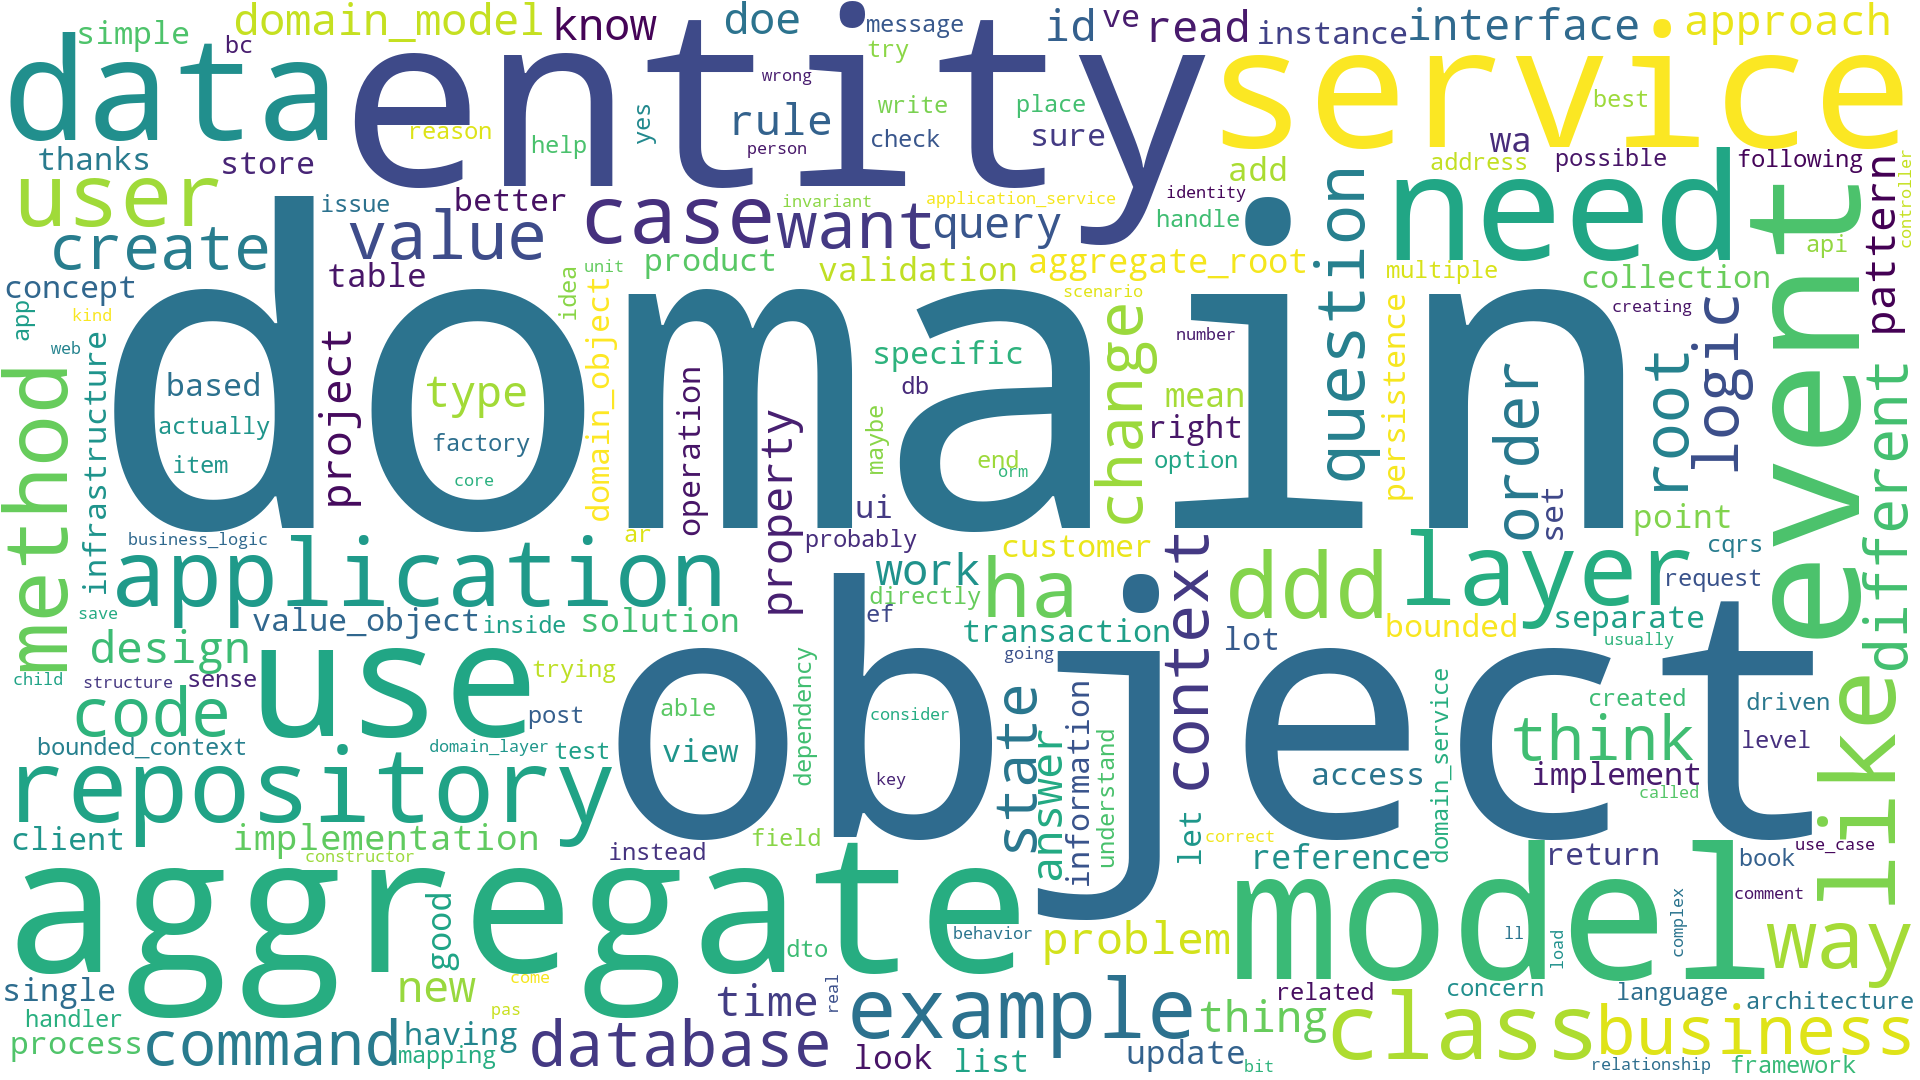

In [56]:
Image(os.path.join(rep_wordcloud_artefact['artefact_value']['base_path'], 
                                   rep_wordcloud_artefact['artefact_value']['file_name']),
     width=1000)

## Topics

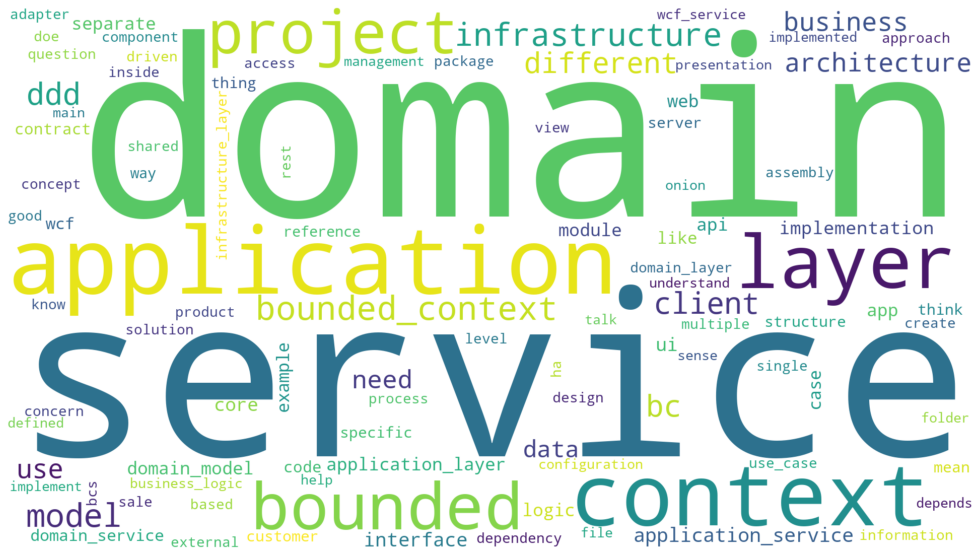

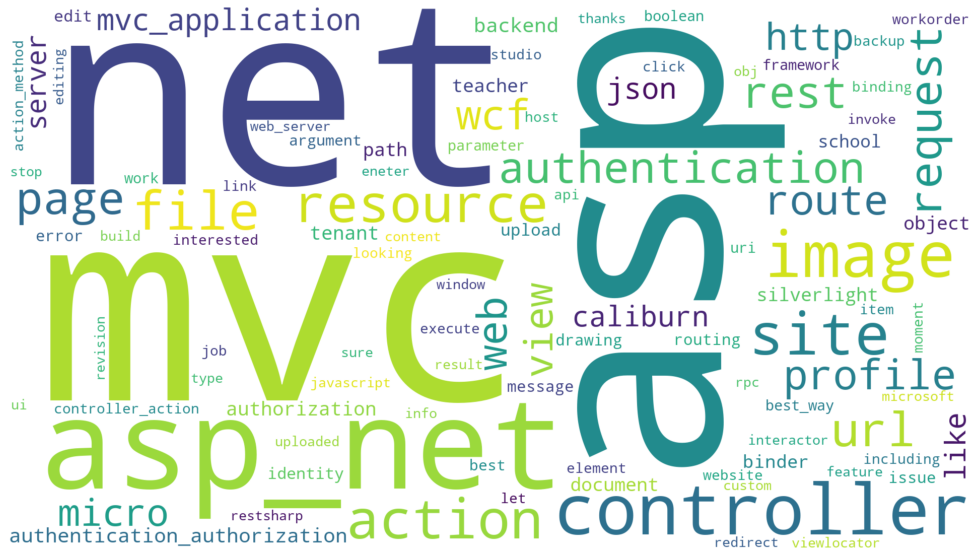

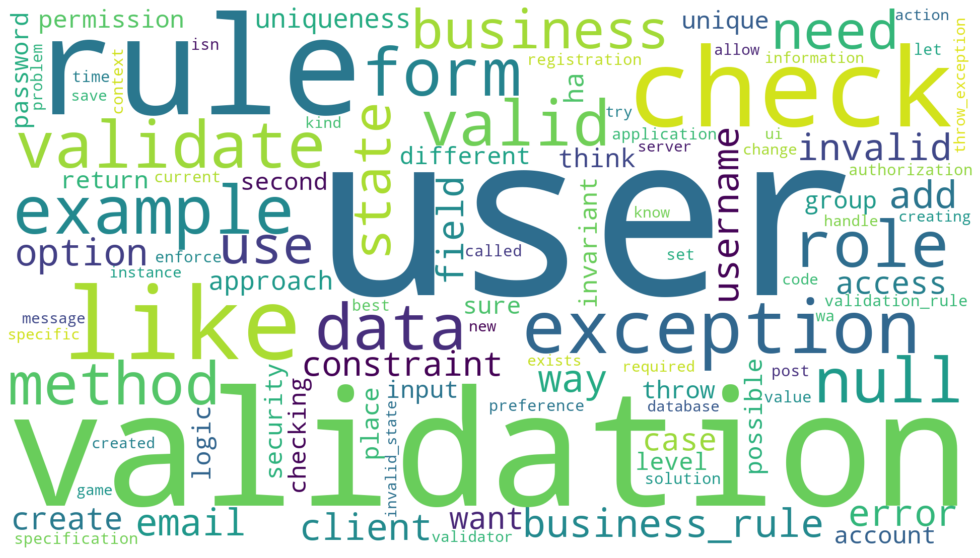

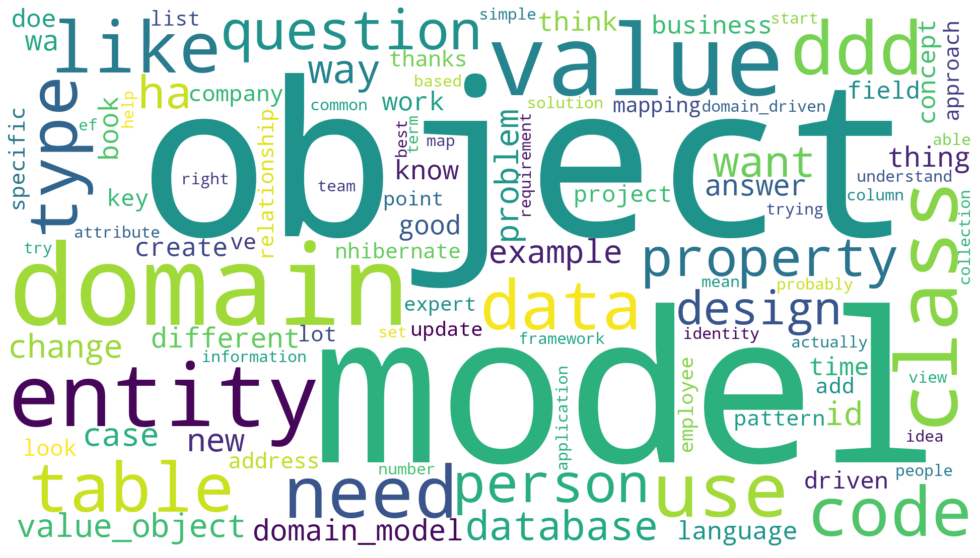

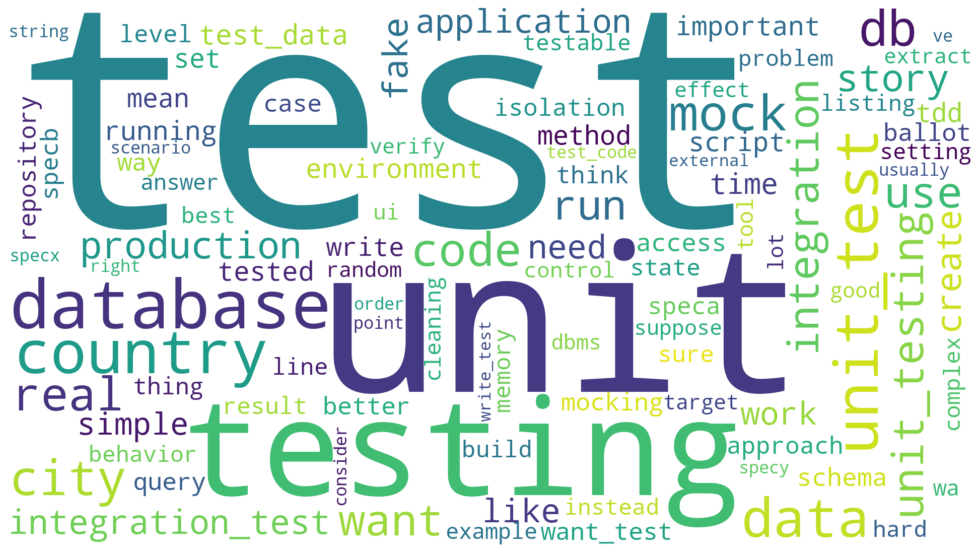

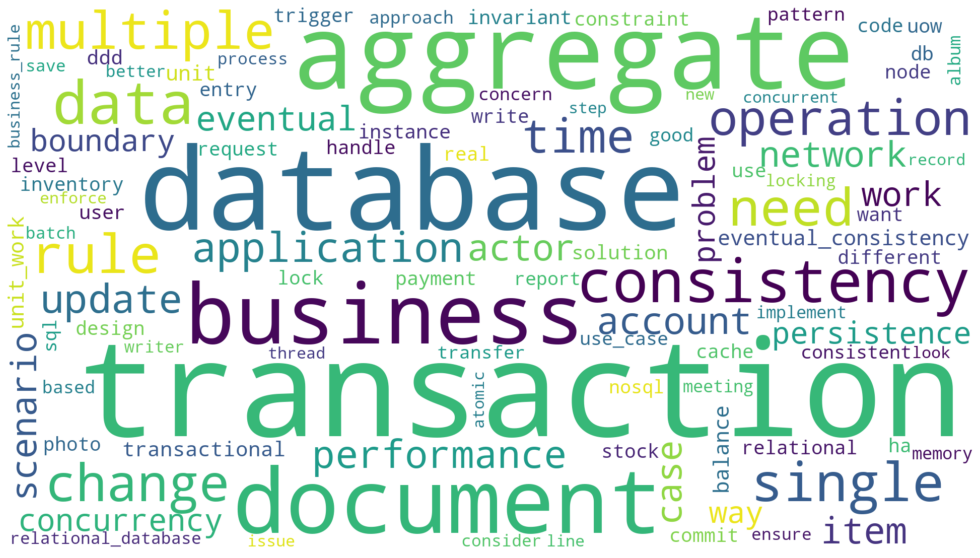

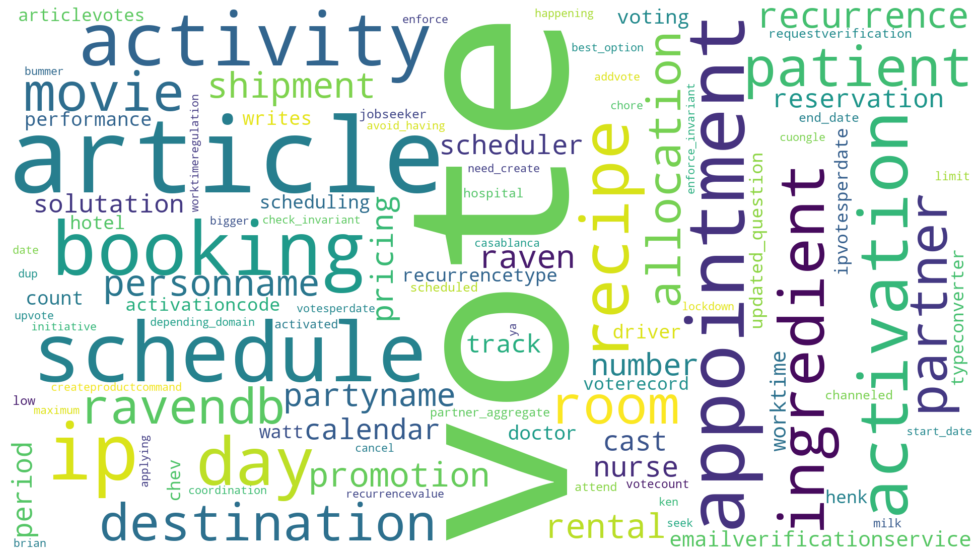

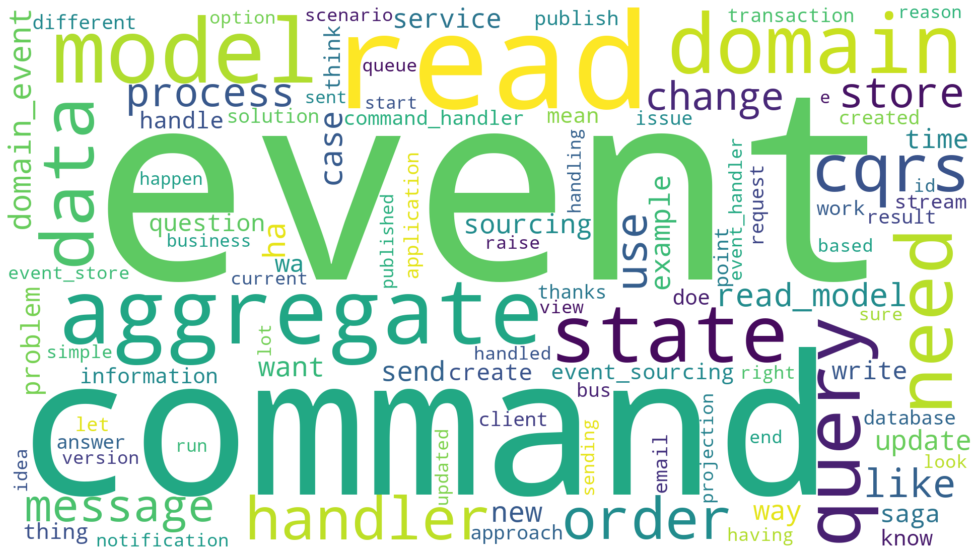

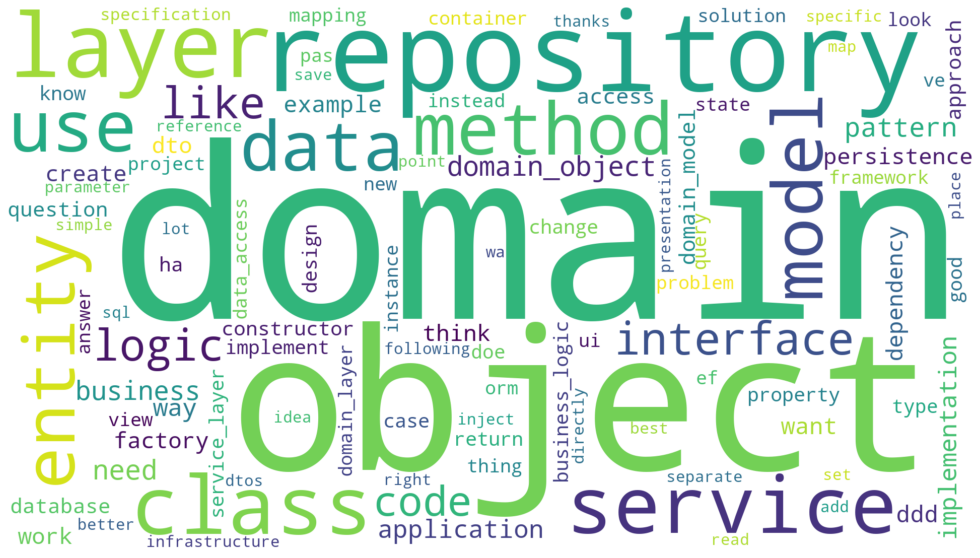

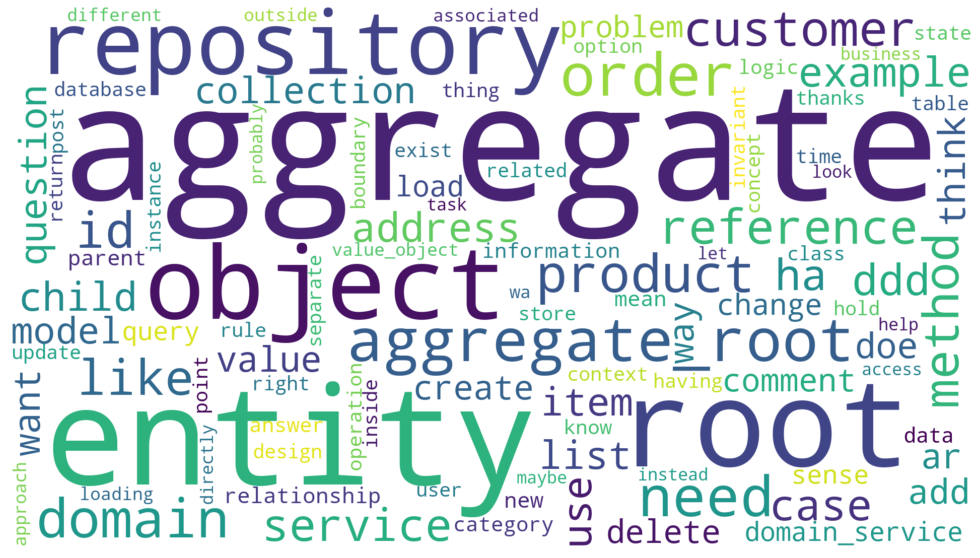

In [57]:
   
    display(HTML('<h1>Wordclouds per topic</h1>'))
    display(HTML('<hr width="85%" align="left">'))
    for topic in range(10):
        display(HTML(f'<h2>Topic {topic+1}</h2>'))
        fig= plt.figure(figsize=(20,10))
        img = so_ana_reporting.WCReports.wc_for_topics_of_topic_model( lda_model_obj=lda_model,
                                                                       topic_nr=topic,
                                                                       file_name=None,
                                                                       topn=100)
        img
        img.show()
        display(HTML('<hr width="85%" align="left">'))
        print()

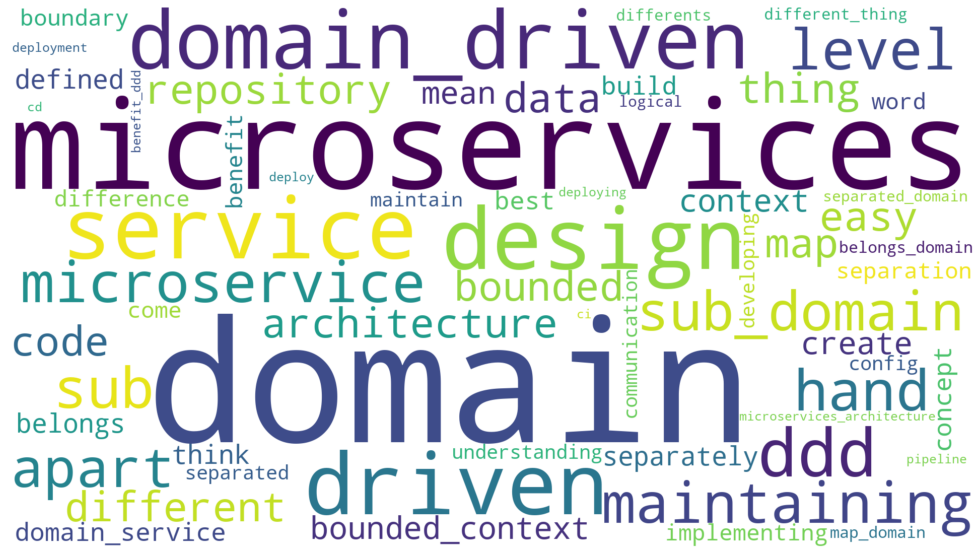

In [58]:
ord_key  =0
    
display(HTML('<h1>Wordclouds for document</h1>'))
print()

wc_report = so_ana_reporting.WCReports(deps_obj=deps,
                                       step='#5',
                                       step_label=all_steps.loc['#5']['step_label'])

fig = plt.figure(figsize=(20,10))
img = wc_report.wc_for_doc(ord_key=ord_key, file_name=None)
img.show()
    
display(HTML('<hr width="85%" align="left">'))

# LDAvis Analysis

In [59]:
display(HTML('<h1>Mapping Gensim-Topics -> LDAVis-Topics</h1>'))
for i, item in enumerate(sorted(artefact_dict[('#7', 'doc_topic_weights')]['artefact_value']['total_weight_sum'].items(), key=lambda x: x[1], reverse=True)):
    print(f' {item[0]} (weight="{item[1]}") -> {i+1}')

 3 (weight="1510.7336509109882") -> 1
 8 (weight="1461.2225248126415") -> 2
 9 (weight="1084.6797692977198") -> 3
 7 (weight="767.5049603713742") -> 4
 0 (weight="635.1163215850102") -> 5
 2 (weight="321.2358081882703") -> 6
 5 (weight="199.58219710261983") -> 7
 4 (weight="55.698867458653694") -> 8
 1 (weight="52.7156190551359") -> 9
 6 (weight="17.51028091561966") -> 10


In [60]:
display(HTML('<h1>LDAvis-Darstellung</h1>'))
display(HTML(os.path.join(rep_LDAvis_artefact['artefact_value']['base_path'], 
                          rep_LDAvis_artefact['artefact_value']['file_name_html']
                         )
            )
       )

In [61]:
display(HTML('<h1>Länge des Vokabulars</h1>'))
print(len(dictionary))

30553


# Load Post information

Create data frame with document meta data

In [147]:
import math

def get_ext_post_meta_data(step_1_label, step_7_label, nr_topics):
    qu = 'select * from so_ana_doc_worker.page_meta_info where step=%(step)s and step_label=%(step_label)s'

    base = pd.read_sql(sql=qu, con=deps.conn, params={'step': '#1', 'step_label': step_1_label})
    base.set_index('ord_key', inplace=True)

    qu2 = 'select ord_key, topic_id, topic_weight from so_ana_analysis.topic_distribution where step=%(step)s and step_label=%(step_label)s and topic_id=%(topic_id)s'

    for i in range(nr_topics):
        pd_new = pd.read_sql(sql=qu2, con=deps.conn, params={'step': '#7', 'step_label': step_7_label, 'topic_id': i})
        pd_new.set_index('ord_key', inplace=True)
        base[f'w_topic_{i}'] = pd_new['topic_weight']

    base.fillna(0, inplace=True)
    return base


def x_log_x(x, thrs=1E-10):
    if x < thrs:
        return -x*math.log2(thrs)
    else:
        return -x*math.log2(x)

class DFEntropyMapper:
    
    def __init__(self, label_template, topic_number):
        self.label_template = label_template
        self.topic_number = topic_number
        
    def __call__(self, row):    
        ret=0.0
        for i in range(self.topic_number):
            ret+= x_log_x(row[self.label_template.format(nr=i)])
        return ret


base = get_ext_post_meta_data(step_1_label=all_steps.loc['#1']['step_label'],
                              step_7_label=all_steps.loc['#7']['step_label'],
                              nr_topics=10)

base['topic_entropy'] = base.apply(DFEntropyMapper('w_topic_{nr}', NR_TOPICS), axis=1)

base.head()

step                            step_label   post_id post_meta_extracted_date                                           post_url  ... w_topic_6 w_topic_7 w_topic_8  w_topic_9  topic_entropy
ord_key                                                                                                                                   ...                                                        
1147      #1  dwnl_ddd_new_reporting_2021_12_28_#1  55697530               2021-12-28        /questions/55697530/ddd-multi-tenant-design  ...  0.000219  0.000219  0.000219   0.477934       1.906607
0         #1  dwnl_ddd_new_reporting_2021_12_28_#1  70479400               2021-12-28  /questions/70479400/what-are-the-differents-be...  ...  0.001043  0.001043  0.095404   0.001043       1.089423
1         #1  dwnl_ddd_new_reporting_2021_12_28_#1  70472179               2021-12-28  /questions/70472179/the-domain-model-needs-to-...  ...  0.002780  0.371139  0.002780   0.375020       1.717176
2         #1  dwnl_ddd_new_reporting_2021_12_28_#1  70463418               2021-12-28  /questions/70463418/implementing-localization-...  ...  0.000765  0.196932  0.539581   0.000765       1.878167
3         #1  dwnl_ddd_new_reporting_2021_12_28_#1  70456073               2021-12-28  /questions/70456073/how-should-i-design-ddd-ag...  ...  0.000540  0.096545  0.000540   0.194199       2.418263

[5 rows x 28 columns]

In [240]:
base.columns

Index(['step', 'step_label', 'post_id', 'post_meta_extracted_date', 'post_url', 'heading', 'excerpt', 'asked_date', 'votes', 'answers', 'answer_status', 'views', 'tags', 'user', 'user_url', 'modus', 'ml_tag', 'w_topic_0', 'w_topic_1', 'w_topic_2', 'w_topic_3', 'w_topic_4', 'w_topic_5', 'w_topic_6',
       'w_topic_7', 'w_topic_8', 'w_topic_9'],
      dtype='object')

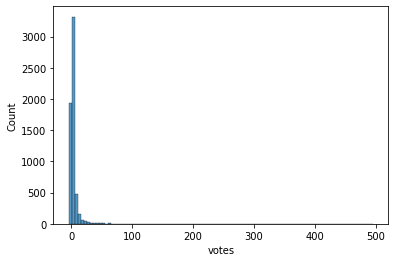

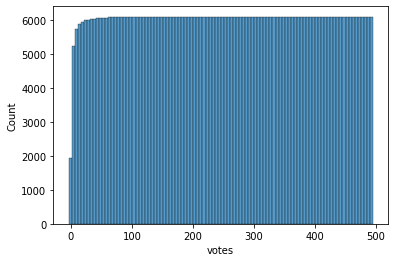

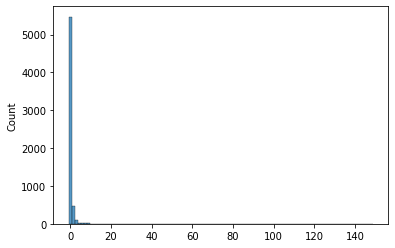

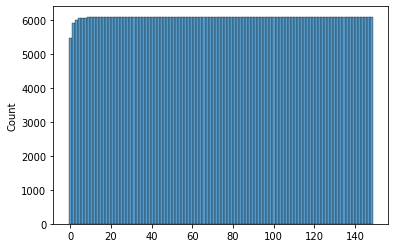

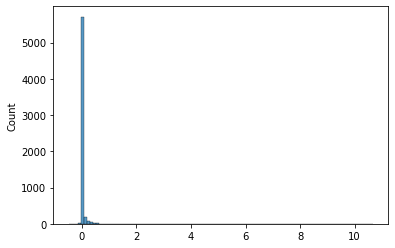

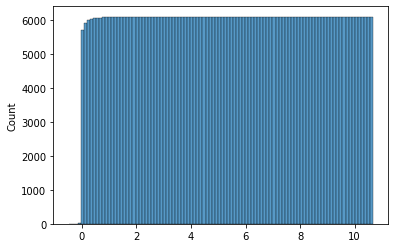

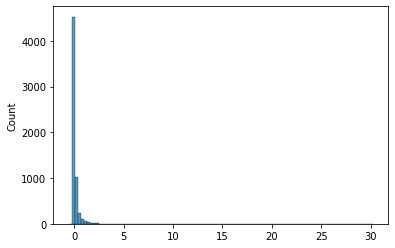

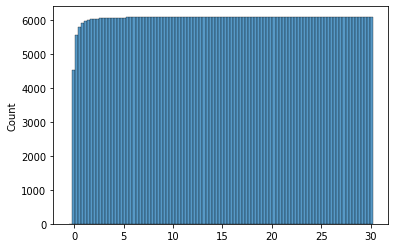

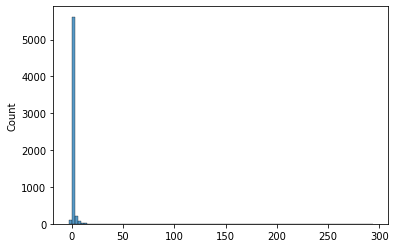

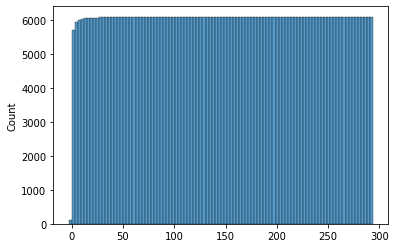

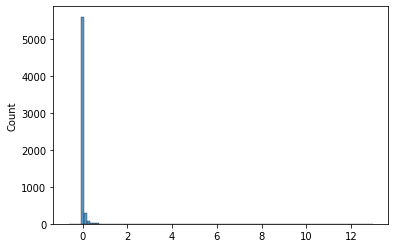

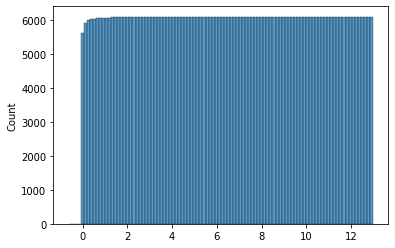

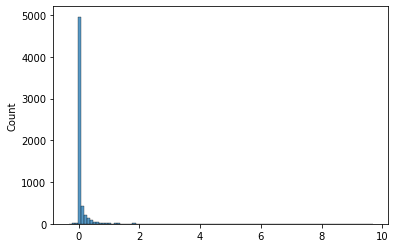

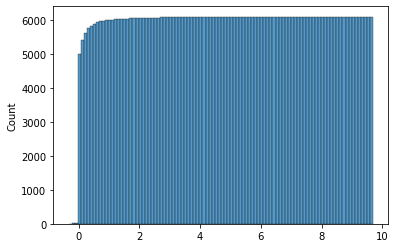

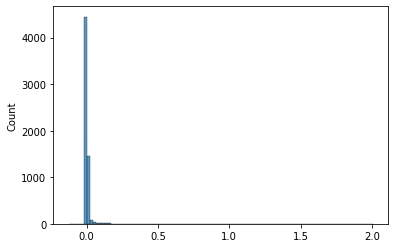

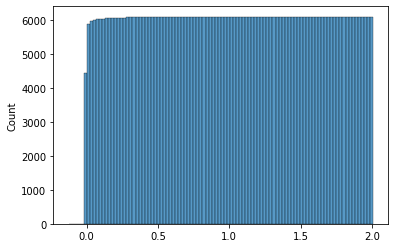

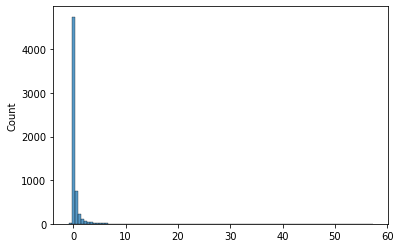

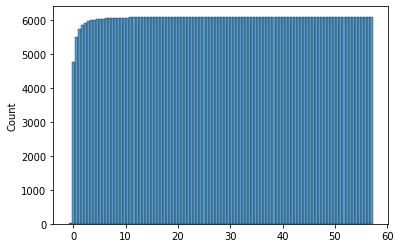

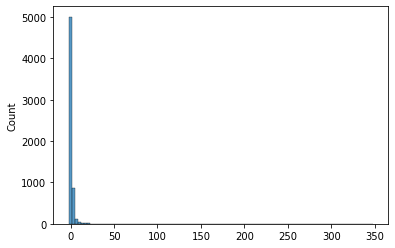

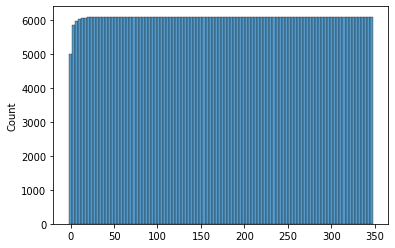

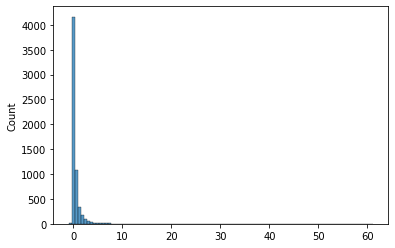

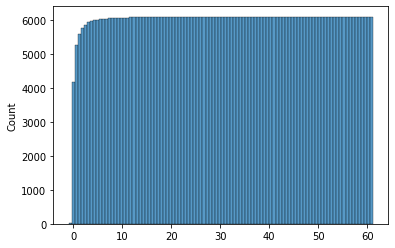

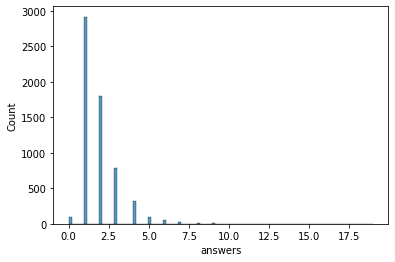

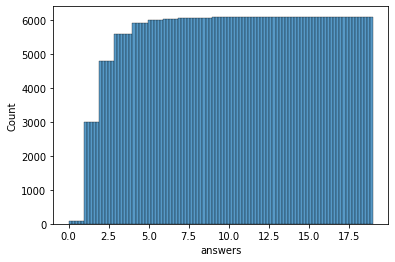

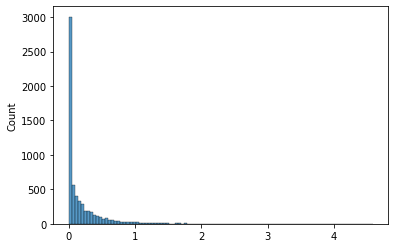

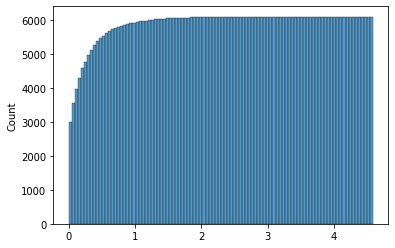

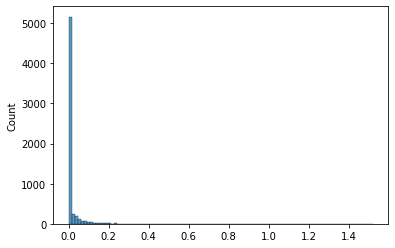

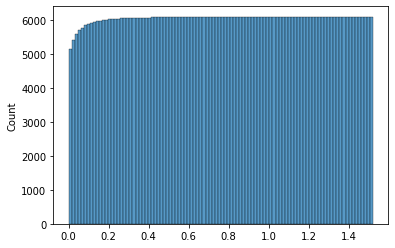

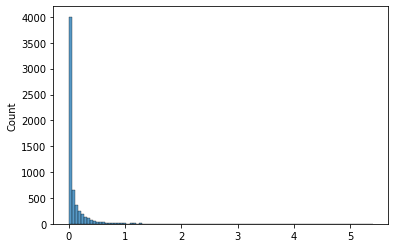

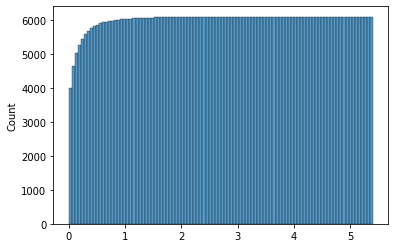

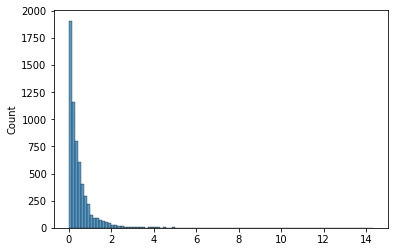

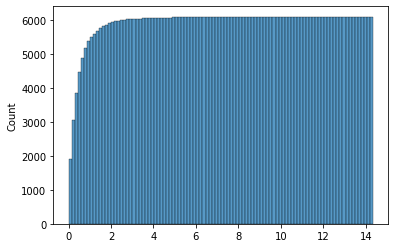

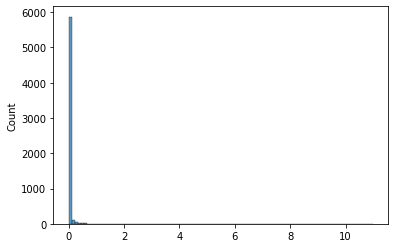

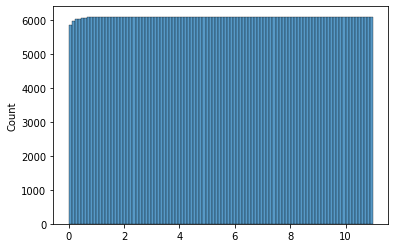

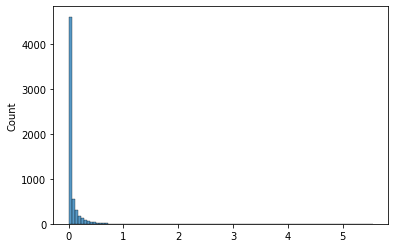

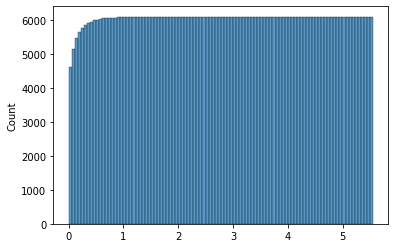

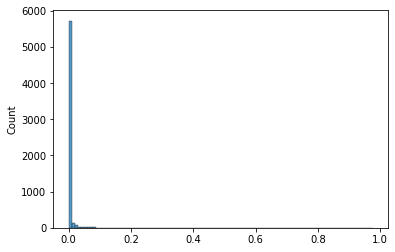

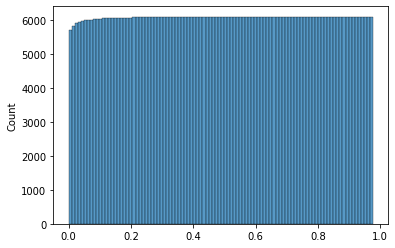

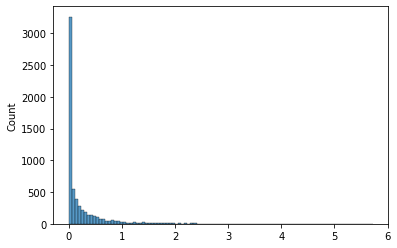

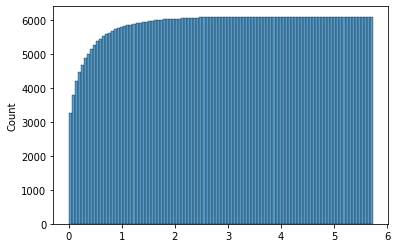

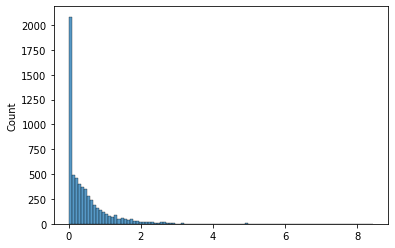

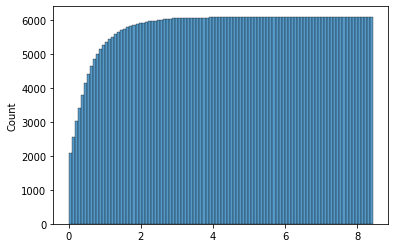

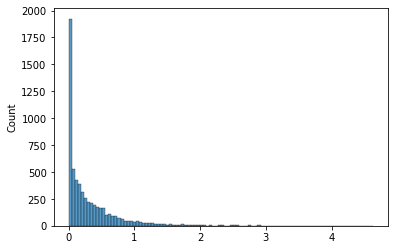

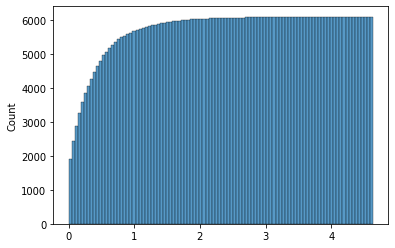

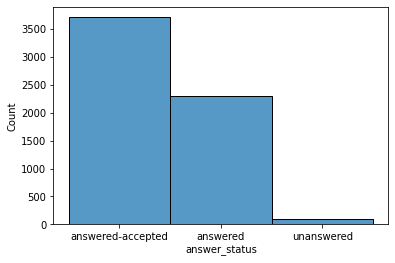

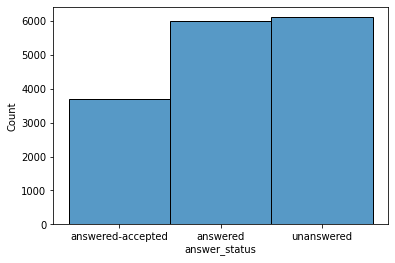

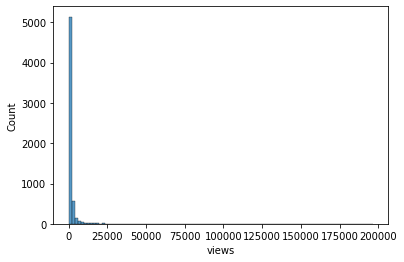

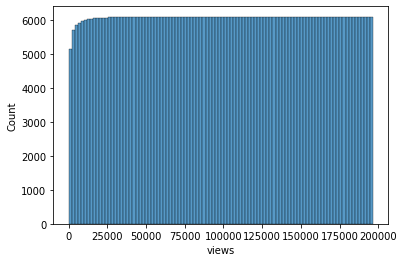

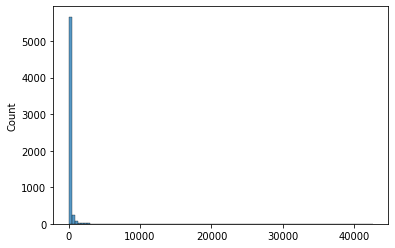

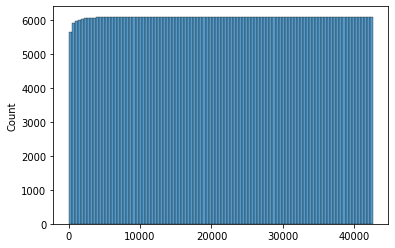

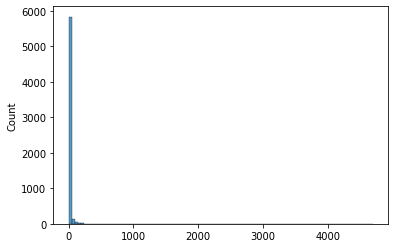

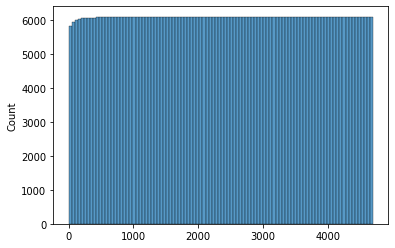

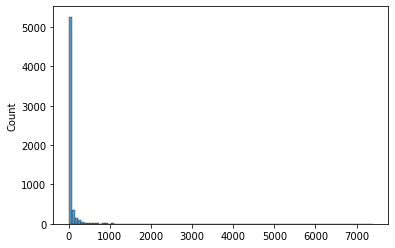

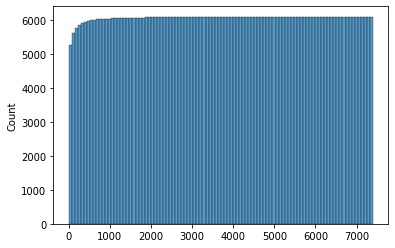

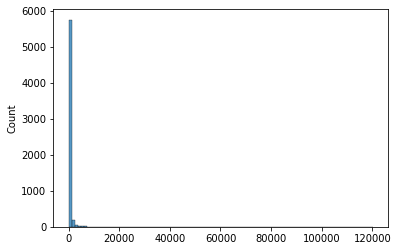

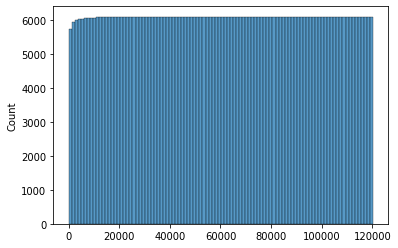

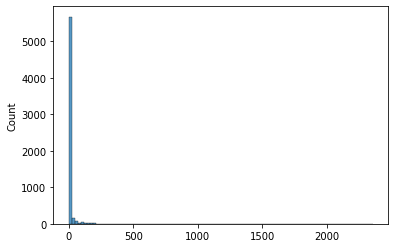

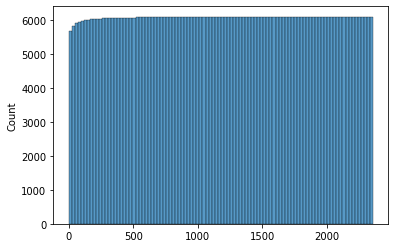

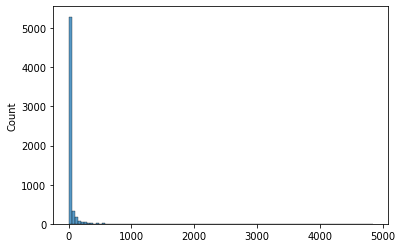

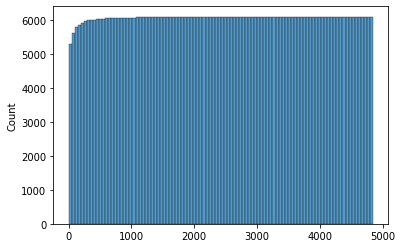

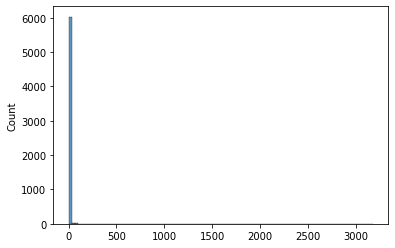

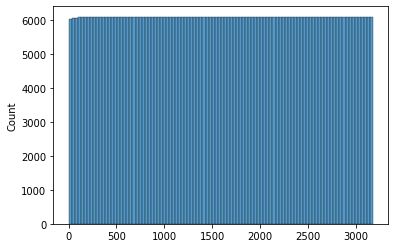

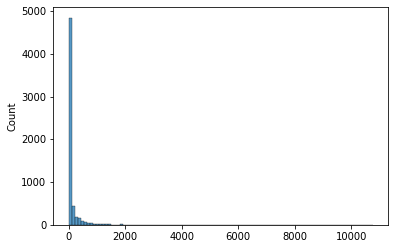

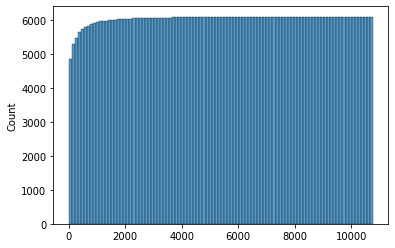

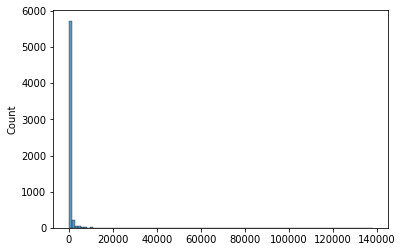

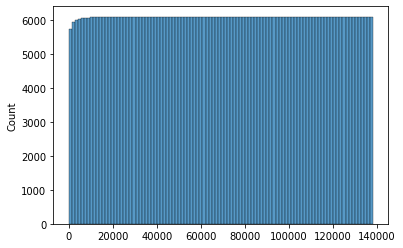

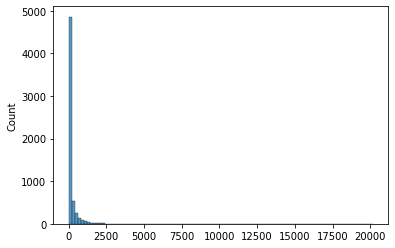

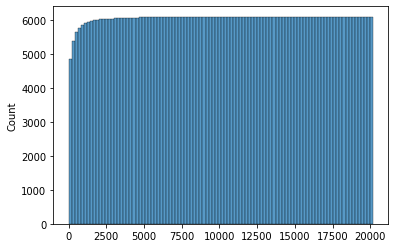

In [258]:
hist_label_list = ['votes', 'answers', 'answer_status', 'views']

display(HTML('<h1>Histograms for quantitative post meta data</h1>'))

for plt_data in hist_label_list:
    rel_data = base[plt_data]
    display(HTML(f'<h2>Histogram ({plt_data})'))
    sns.histplot(rel_data, bins=100, cumulative=False, log_scale=False)
    plt.show()
    display(HTML(f'<h2>Histogram - cumulative ({plt_data})'))
    sns.histplot(rel_data, bins=100, cumulative=True,  log_scale=False)
    plt.show()
    display(HTML(f'<h2>Histogram - topic weighted ({plt_data})'))
    if not plt_data == 'answer_status':
        for topic in range(NR_TOPICS):
            rel_data_2 = base[f'w_topic_{topic}']*rel_data.astype('float')
            display(HTML(f'<h3>Histogram topic [{plt_data}, topic={topic}]</h3>'))
            sns.histplot(rel_data_2, bins=100, cumulative=False, log_scale=False)
            plt.show()
            display(HTML(f'<h3>Histogram topic - cumulative [{plt_data}, topic={topic}]</h3>'))
            sns.histplot(rel_data_2, bins=100, cumulative=True, log_scale=False)
            plt.show()

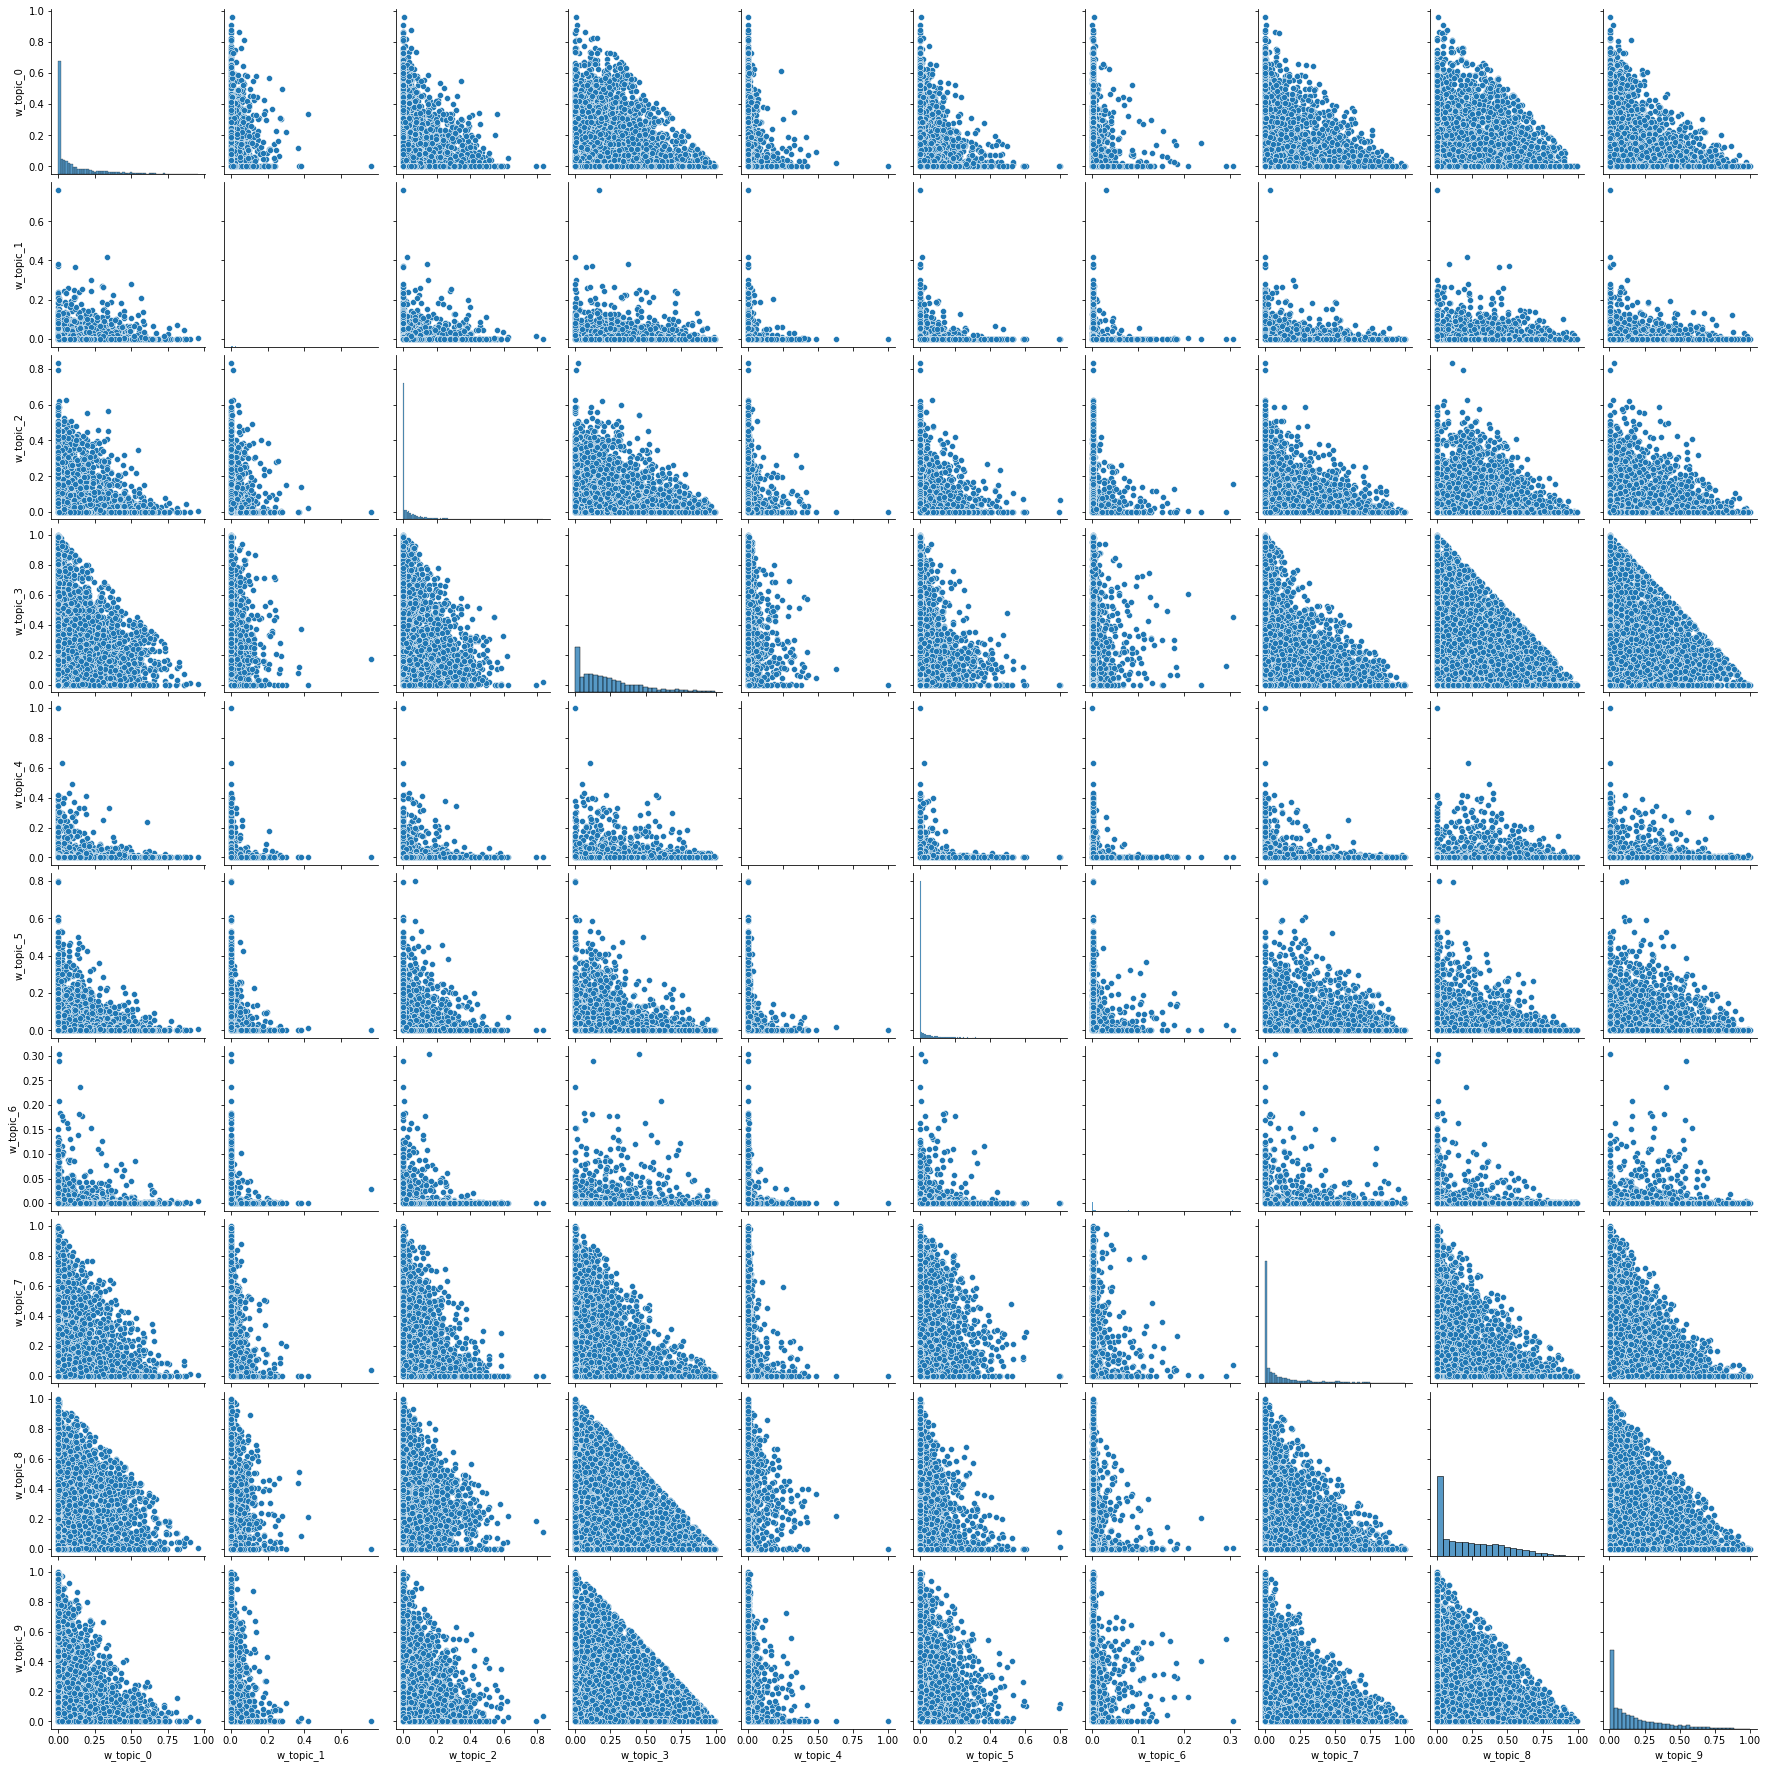

In [257]:
sns.pairplot(base[[f'w_topic_{i}' for i in range(NR_TOPICS)]])

## Create tag-level information




In [155]:
class NormTopMapper:
    
    def __init__(self, comp_series, topic_nr):
        self.comp_series = comp_series
        self.topic_nr = topic_nr
        
    def __call__(self, row):
        lbl=f'total_weight_topic_{self.topic_nr}'
        norm = sum([row[f'total_weight_topic_{i}']/self.comp_series[f'total_weight_topic_{i}'] for i in range(10)])
        return row[lbl]/(self.comp_series[lbl]*norm)
    

@dataclass
class BaseFrameData:
    tags_data: pd.DataFrame
    main_tag_data: pd.Series
    main_tag_label: str
    topic_nr: int
    
    
def get_tags_frame_base(topic_nr, tag_label):  
    label_cnt_dict=defaultdict(lambda: {'total_cnt': 0, **{f'total_weight_topic_{i}': 0 for i in range(topic_nr)}})

    for idx, row in base.iterrows():
        for lbl in row['tags']:
            label_cnt_dict[lbl]['total_cnt']+=1
            for i in range(topic_nr):
                label_cnt_dict[lbl][f'total_weight_topic_{i}']+=row[f'w_topic_{i}']

    for key, value in label_cnt_dict.items():
        label_cnt_dict[key]['tag']=key

    tags_frame=pd.DataFrame.from_records([res for res in label_cnt_dict.values()])
    comp_weights = tags_frame[tags_frame['tag']==tag_label]
    
    return BaseFrameData(tags_data=tags_frame[tags_frame['tag']!=tag_label],
                         main_tag_data=comp_weights,
                         main_tag_label=tag_label,
                         topic_nr=topic_nr
                         )

def extend_base_frame(base_data: BaseFrameData):
    tags_frame=base_data.tags_data
    for i in range(base_data.topic_nr):
        tags_frame[f'normed_weight_{i}'] = tags_frame.apply(NormTopMapper(base_data.main_tag_data, i), 
                                                            axis=1)
    lbl_lst=[f'normed_weight_{i}' for i in range(base_data.topic_nr)]
    tags_frame['weight_entropy']=tags_frame.apply(DFEntropyMapper('normed_weight_{nr}', base_data.topic_nr), axis=1)
    tags_frame['max_normed_topic_weight']=tags_frame[lbl_lst].max(axis=1)
    tags_frame['dominant_normed_topic']=tags_frame[lbl_lst].apply(lambda row: row.argmax(), axis=1)
    
    return BaseFrameData(tags_data=tags_frame,
                         main_tag_data=base_data.main_tag_data,
                         main_tag_label=base_data.main_tag_label,
                         topic_nr=base_data.topic_nr
                         )


    
tag_level_data = get_tags_frame_base(topic_nr=NR_TOPICS, 
                                     tag_label=TAG_LABEL)

tag_level_data = extend_base_frame(tag_level_data)


tag  weight_entropy  max_normed_topic_weight  dominant_normed_topic  total_cnt   score_0
410                  project        1.284911                 0.757920                      0          2  0.227605
465                 solution        1.393538                 0.758043                      0          1  0.227528
770                   github        1.363087                 0.706385                      0          1  0.212030
1109                  layout        1.513073                 0.680430                      0          1  0.204244
453            nuget-package        1.618293                 0.667304                      0          1  0.200306
815   application-dependency        1.723138                 0.666577                      0          1  0.200088
628        project-structure        1.758919                 0.654114                      0          2  0.196463
404                 autoload        1.633589                 0.649637                      0          1  0.195006
212            sqlconnection        1.724489                 0.641780                      0          1  0.192649
484     restful-architecture        1.826600                 0.639107                      0          2  0.191961

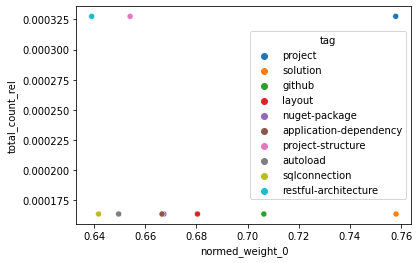

tag  weight_entropy  max_normed_topic_weight  dominant_normed_topic  total_cnt   score_1
1007  ruby-on-rails-3        0.641317                 0.883521                      1          1  0.265171
1009           routes        0.641317                 0.883521                      1          1  0.265171
1008          routing        0.641317                 0.883521                      1          1  0.265171
324   export-to-excel        0.808352                 0.862592                      1          1  0.258892
326              vuex        0.939419                 0.850944                      1          1  0.255398
325            vue.js        0.939419                 0.850944                      1          1  0.255398
1052    communication        0.755492                 0.846308                      1          1  0.254007
1104        protocols        1.020228                 0.827672                      1          1  0.248416
1105          proxies        1.020228                 0.827672                      1          1  0.248416
1080  silverlight-4.0        1.071623                 0.827098                      1          1  0.248244

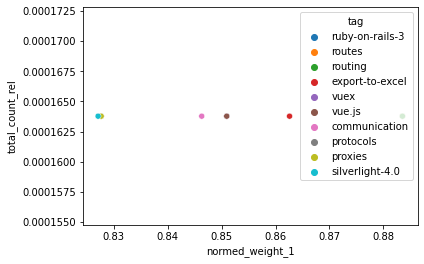

tag  weight_entropy  max_normed_topic_weight  dominant_normed_topic  total_cnt   score_2
877         post-conditions        0.670166                 0.904163                      2          2  0.271478
694           preconditions        0.977601                 0.849461                      2          3  0.255182
848                tapestry        1.201251                 0.786073                      2          1  0.235937
782                    hash        1.428015                 0.729062                      2          1  0.218833
981            distribution        1.270845                 0.709620                      2          1  0.213001
980                     jar        1.270845                 0.709620                      2          1  0.213001
693   defensive-programming        1.569162                 0.696243                      2          1  0.208988
467           symfony-forms        1.571343                 0.686446                      2          1  0.206048
1129                zend-db        1.449531                 0.677854                      2          1  0.203471
1130              zend-auth        1.449531                 0.677854                      2          1  0.203471

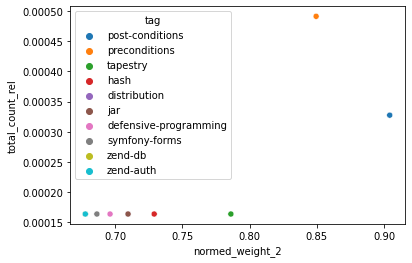

tag  weight_entropy  max_normed_topic_weight  dominant_normed_topic  total_cnt   score_3
1102                   class-hierarchy        0.476568                 0.936861                      3          1  0.281173
1144                          ubiquity        0.879256                 0.856358                      3          1  0.257022
343   entity-framework-core-migrations        1.191252                 0.792832                      3          1  0.237964
995                              party        1.258321                 0.766599                      3          1  0.230094
737                        complextype        1.171096                 0.764831                      3          2  0.229679
507                      code-analysis        1.326556                 0.744827                      3          1  0.223563
508               static-code-analysis        1.326556                 0.744827                      3          1  0.223563
506                          resharper        1.326556                 0.744827                      3          1  0.223563
1115                 dynamic-languages        1.103348                 0.736510                      3          1  0.221068
804                       commondomain        1.403467                 0.722565                      3          1  0.216884

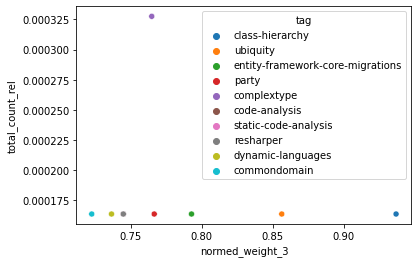

tag  weight_entropy  max_normed_topic_weight  dominant_normed_topic  total_cnt   score_4
1030            smalltalk        0.351256                 0.944967                      4          1  0.283605
292           data-access        0.568612                 0.917088                      4          3  0.275470
531           nsubstitute        0.761742                 0.885548                      4          1  0.265779
620              selenium        0.734595                 0.877112                      4          1  0.263248
498   integration-testing        0.891778                 0.874559                      4          2  0.262597
533           autofixture        0.811054                 0.872065                      4          2  0.261849
1071                 stub        0.801244                 0.869046                      4          1  0.260828
221               phpunit        0.946790                 0.856613                      4          3  0.257328
154         code-coverage        0.963530                 0.845082                      4          2  0.253754
629           readability        1.035891                 0.839596                      4          1  0.251993

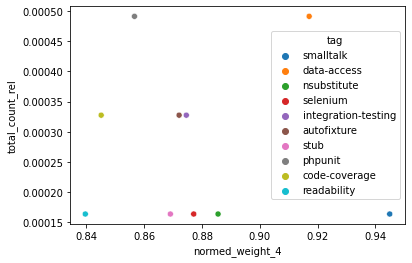

tag  weight_entropy  max_normed_topic_weight  dominant_normed_topic  total_cnt   score_5
1062               multi-user        0.580242                 0.912455                      5          1  0.273851
609                   locking        1.147507                 0.818546                      5          2  0.245793
227          computer-science        0.819887                 0.797306                      5          1  0.239306
660                  sharding        1.412960                 0.740336                      5          1  0.222216
619   service-fabric-stateful        1.470303                 0.726386                      5          1  0.218031
1078          synchronization        1.476157                 0.690273                      5          1  0.207196
106       pessimistic-locking        1.297249                 0.687996                      5          1  0.206513
316                  reactive        1.571719                 0.666891                      5          1  0.200182
611          distributed-lock        1.837288                 0.654667                      5          1  0.196515
933           database-driven        1.608602                 0.654359                      5          1  0.196422

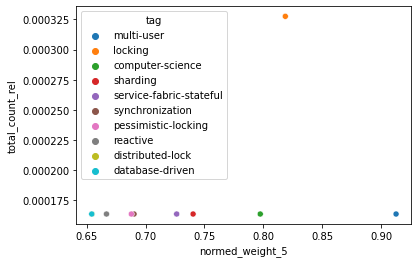

tag  weight_entropy  max_normed_topic_weight  dominant_normed_topic  total_cnt   score_6
810                     adhoc        0.408753                 0.945686                      6          1  0.283820
809              jasperserver        0.610314                 0.915974                      6          2  0.275022
808            jasper-reports        0.610314                 0.915974                      6          2  0.275022
551              availability        0.871176                 0.855329                      6          1  0.256713
638                 java-ee-7        0.942142                 0.786335                      6          1  0.236015
833                     grasp        1.147248                 0.784288                      6          1  0.235401
174               api-gateway        1.348541                 0.732816                      6          1  0.219960
564                 scheduler        1.388164                 0.715937                      6          1  0.214896
913  object-oriented-database        1.400840                 0.703406                      6          1  0.211137
297                   request        1.618241                 0.687054                      6          1  0.206231

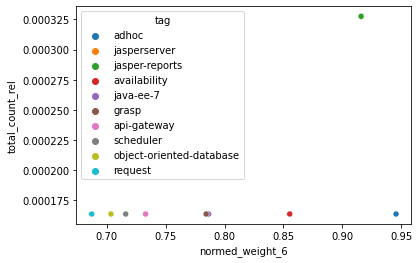

tag  weight_entropy  max_normed_topic_weight  dominant_normed_topic  total_cnt   score_7
246             event-bus        0.265517                 0.968217                      7          1  0.290580
152          data-caching        0.849529                 0.861590                      7          1  0.258592
656            reentrancy        0.957070                 0.842249                      7          1  0.252789
655             semaphore        0.957070                 0.842249                      7          1  0.252789
654                 queue        0.957070                 0.842249                      7          1  0.252789
450           eventsource        1.124415                 0.771387                      7          1  0.231531
630  integration-patterns        1.391908                 0.715578                      7          1  0.214788
852        data-migration        1.436066                 0.706408                      7          1  0.212037
489              snapshot        1.685536                 0.695099                      7          2  0.208759
413                   eda        1.666134                 0.680454                      7          4  0.204595

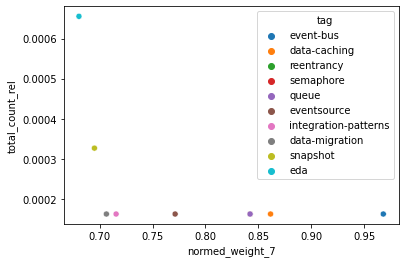

tag  weight_entropy  max_normed_topic_weight  dominant_normed_topic  total_cnt   score_8
1013                   jsf        1.091503                 0.801020                      8          1  0.240421
1049    enterprise-library        1.388796                 0.760537                      8          1  0.228276
746       data-persistence        1.261047                 0.735342                      8          1  0.220717
1159           data-layers        1.269627                 0.721225                      8          1  0.216482
1065                 guice        1.219423                 0.713936                      8          1  0.214296
773       abstract-factory        1.591376                 0.711831                      8          2  0.213778
1023                  pojo        1.455515                 0.679701                      8          1  0.204025
204         domain-mapping        1.582182                 0.666128                      8          1  0.199953
153   android-architecture        1.465996                 0.663065                      8          1  0.199034
818                   jdbc        1.563984                 0.654118                      8          1  0.196350

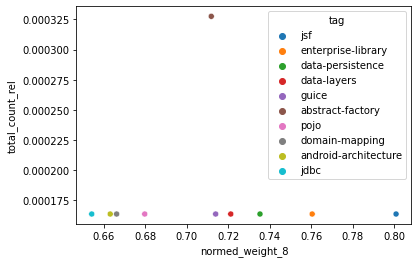

tag  weight_entropy  max_normed_topic_weight  dominant_normed_topic  total_cnt   score_9
986                          cascade        0.985445                 0.798860                      9          1  0.239773
1123                 select-n-plus-1        1.609621                 0.643736                      9          1  0.193235
574                            rdbms        1.322485                 0.638372                      9          1  0.191626
922                             hilo        1.597883                 0.632094                      9          1  0.189743
923                  object-identity        1.597883                 0.632094                      9          1  0.189743
14                                c#        3.293499                 0.127211                      8       1351  0.182607
1121                method-signature        1.755301                 0.594743                      9          1  0.178538
1124                      lightspeed        1.459813                 0.564870                      9          1  0.169576
243                            local        2.009806                 0.556698                      9          2  0.167239
193   automapper-collections-ef-core        1.817321                 0.537382                      9          1  0.161329

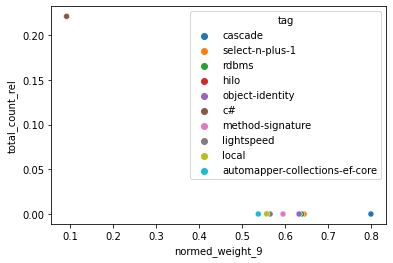

In [261]:
LAMBDA_VAL=0.3
display(HTML('<h1>Most relevant tags for topics</h1>'))

def extend_by_scores(tag_level_data, lambda_val):
    tags_frame=tag_level_data.tags_data
    doc_cnt=tag_level_data.main_tag_data['total_cnt'].values[0]
    for i in range(tag_level_data.topic_nr):
        tags_frame[f'score_{i}']=lambda_val*tags_frame[f'normed_weight_{i}'] + (1-lambda_val)*tags_frame['total_cnt']/doc_cnt
    return tags_frame

tags_frame=extend_by_scores(tag_level_data, lambda_val=LAMBDA_VAL)
doc_cnt=tag_level_data.main_tag_data['total_cnt'].values[0]
tags_frame['total_count_rel'] = tags_frame['total_cnt']/doc_cnt


for i in range(10):
    prt_data = tags_frame.sort_values(f'score_{i}', ascending=False).iloc[:10,:]
    display(HTML(f'<h2>Topic: {i}</h2>'))
    display(prt_data[['tag', 'weight_entropy', 'max_normed_topic_weight', 'dominant_normed_topic', 'total_cnt', f'score_{i}']])
    
    sbn.scatterplot(data=prt_data, x=f'normed_weight_{i}', y='total_count_rel', hue='tag')
    plt.show()

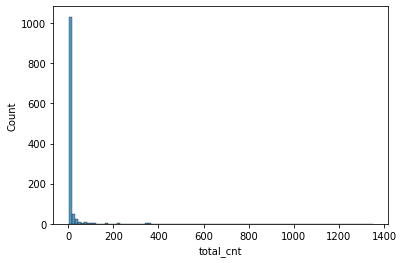

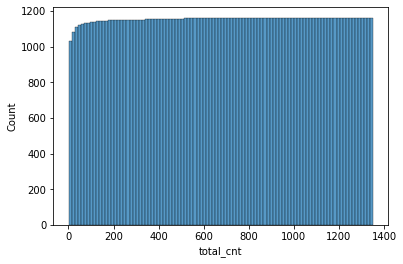

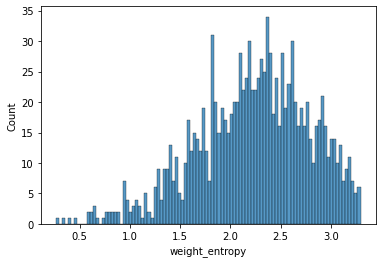

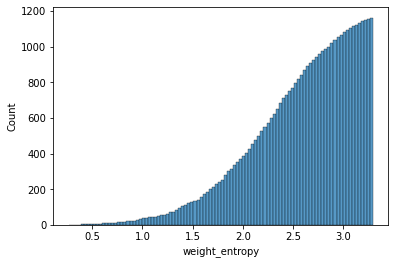

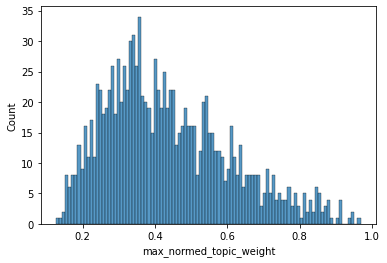

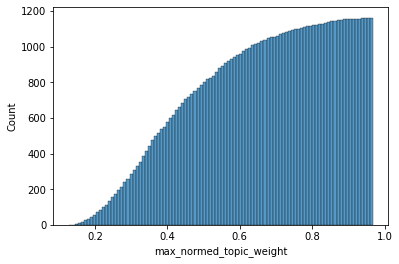

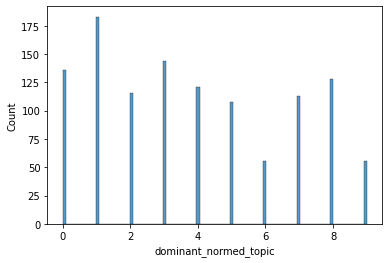

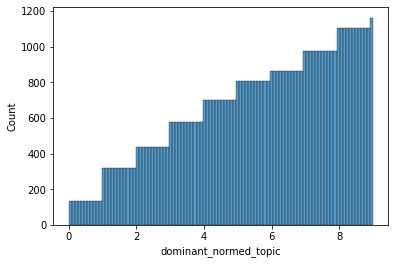

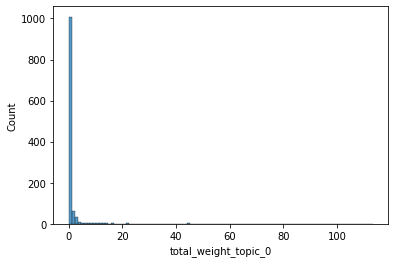

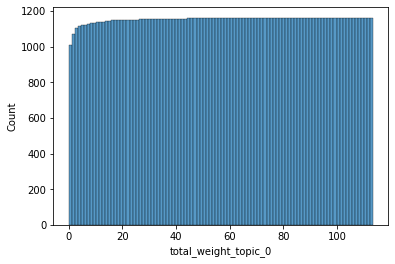

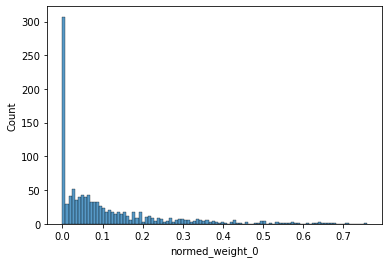

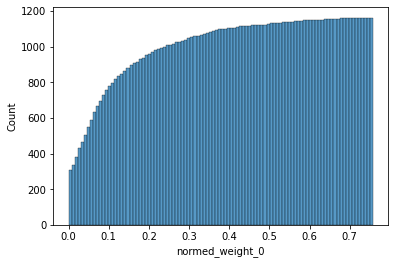

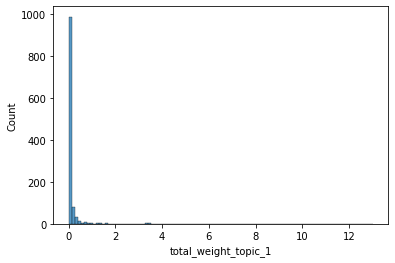

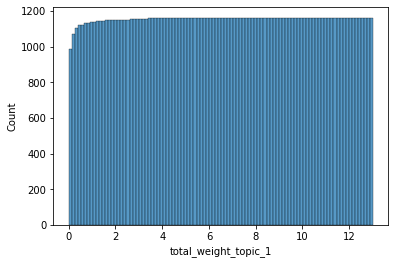

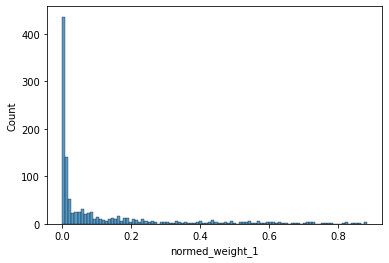

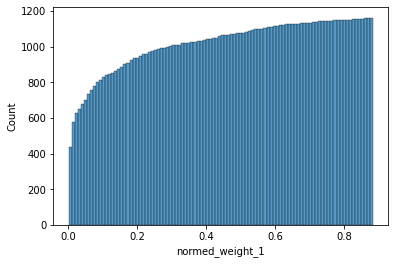

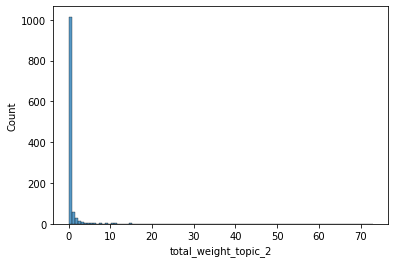

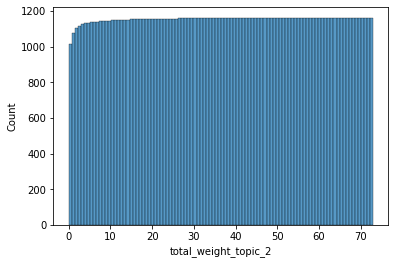

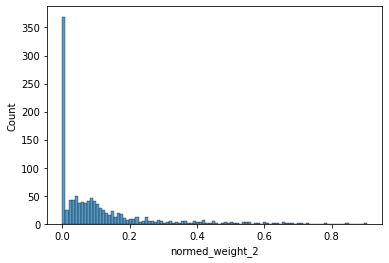

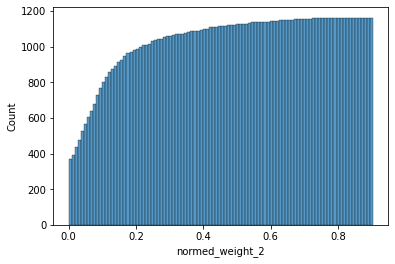

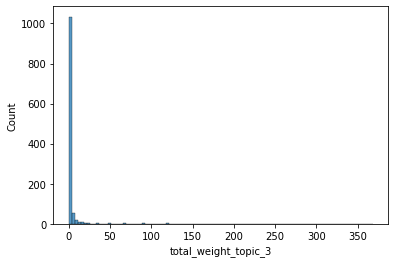

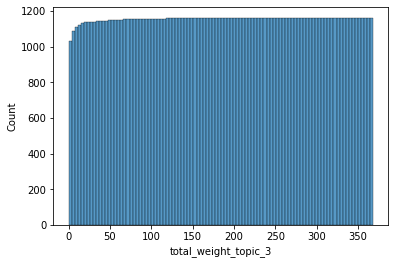

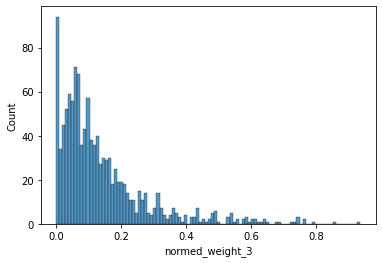

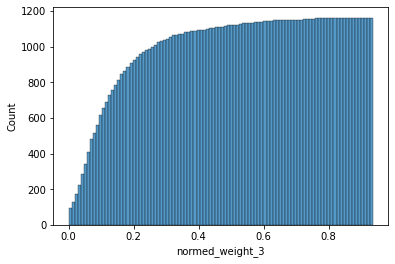

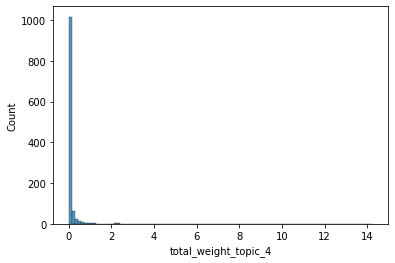

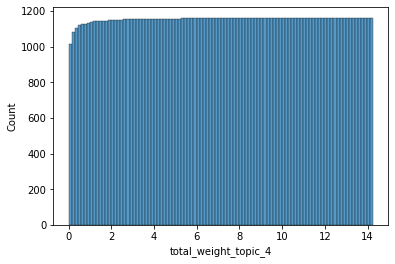

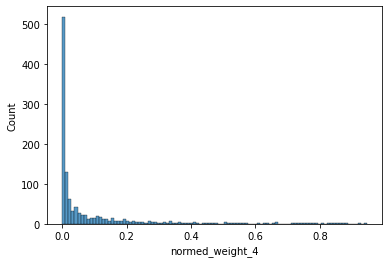

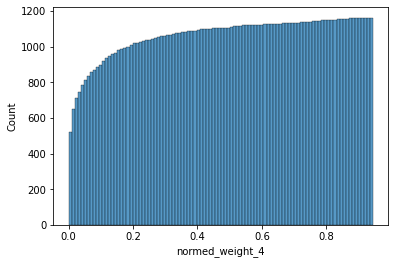

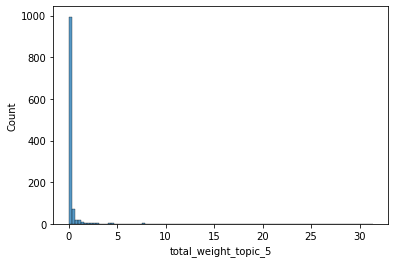

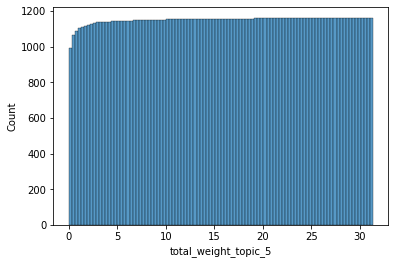

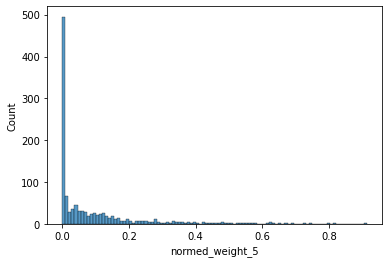

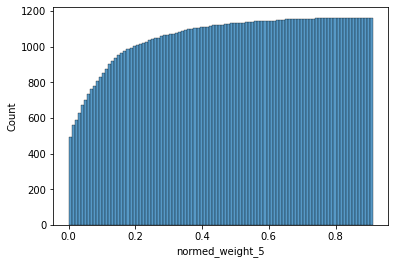

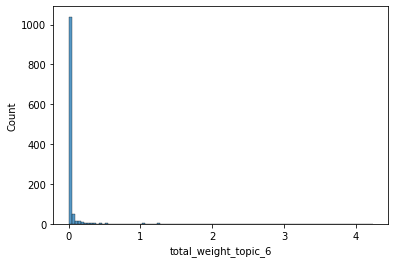

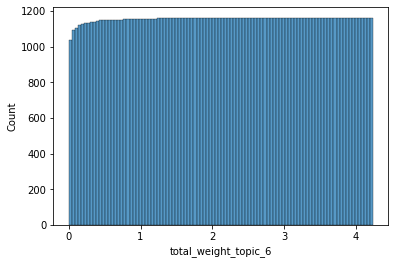

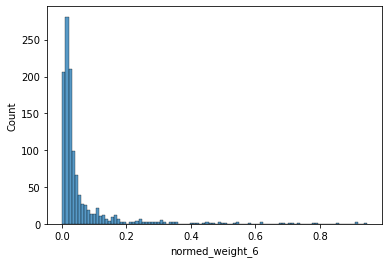

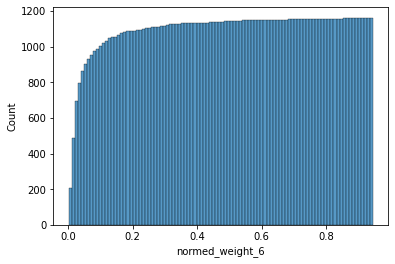

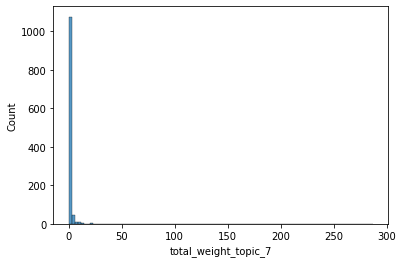

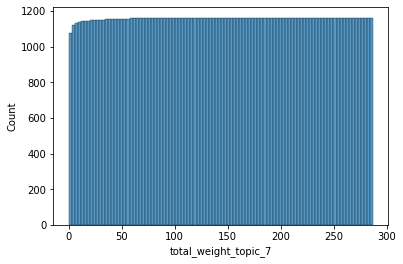

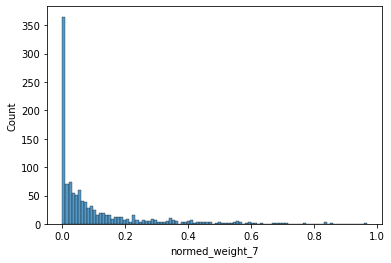

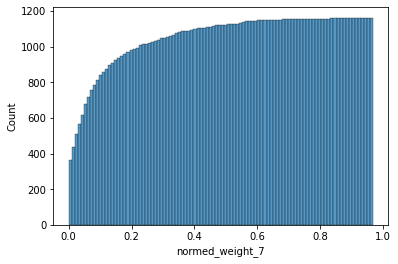

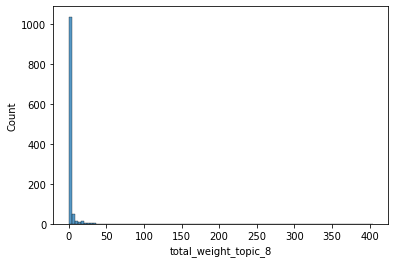

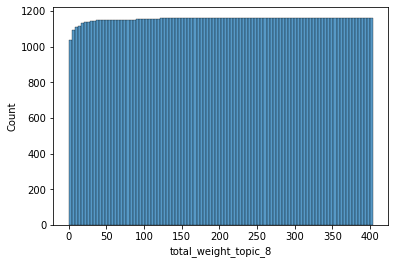

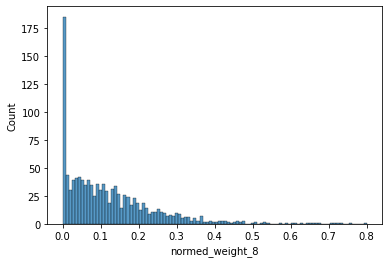

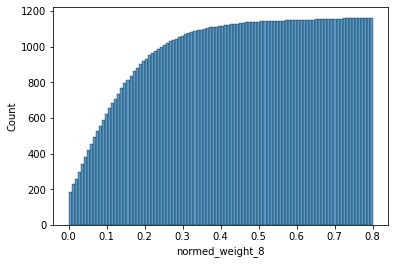

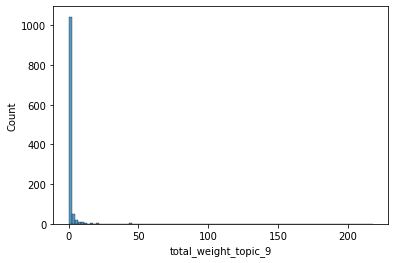

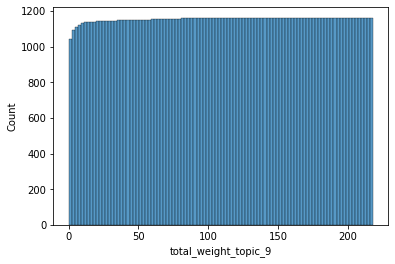

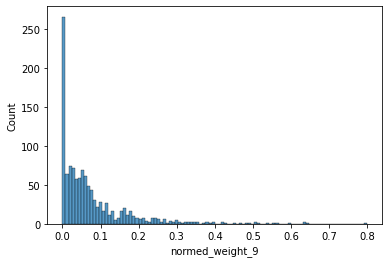

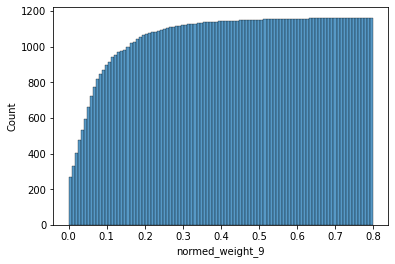

In [266]:
hist_labels=['total_cnt', 'weight_entropy', 'max_normed_topic_weight', 'dominant_normed_topic']
hist_labels_templates=['total_weight_topic_{nr}', 'normed_weight_{nr}']
tags_frame=tag_level_data.tags_data

display(HTML('<h1>Histograms for tag level data data</h1>'))

for plt_data in hist_labels:
    rel_data = tags_frame[plt_data]
    display(HTML(f'<h2>Histogram ({plt_data})'))
    sbn.histplot(rel_data, bins=100, cumulative=False, log_scale=False)
    plt.show()
    display(HTML(f'<h2>Histogram - cumulative ({plt_data})'))
    sbn.histplot(rel_data, bins=100, cumulative=True,  log_scale=False)
    plt.show()
    
for topic_nr in range(NR_TOPICS):
    display(HTML(f'<h2>Topic: ({topic_nr})'))
    for plt_data_template in hist_labels_templates:
        plt_data=plt_data_template.format(nr=topic_nr)
        rel_data = tags_frame[plt_data]
        display(HTML(f'<h2>Histogram (topic "{topic_nr}", {plt_data})'))
        sbn.histplot(rel_data, bins=100, cumulative=False, log_scale=False)
        plt.show()
        display(HTML(f'<h2>Histogram - dumulative (topic "{topic_nr}", {plt_data})'))
        sbn.histplot(rel_data, bins=100, cumulative=True,  log_scale=False)
        plt.show()

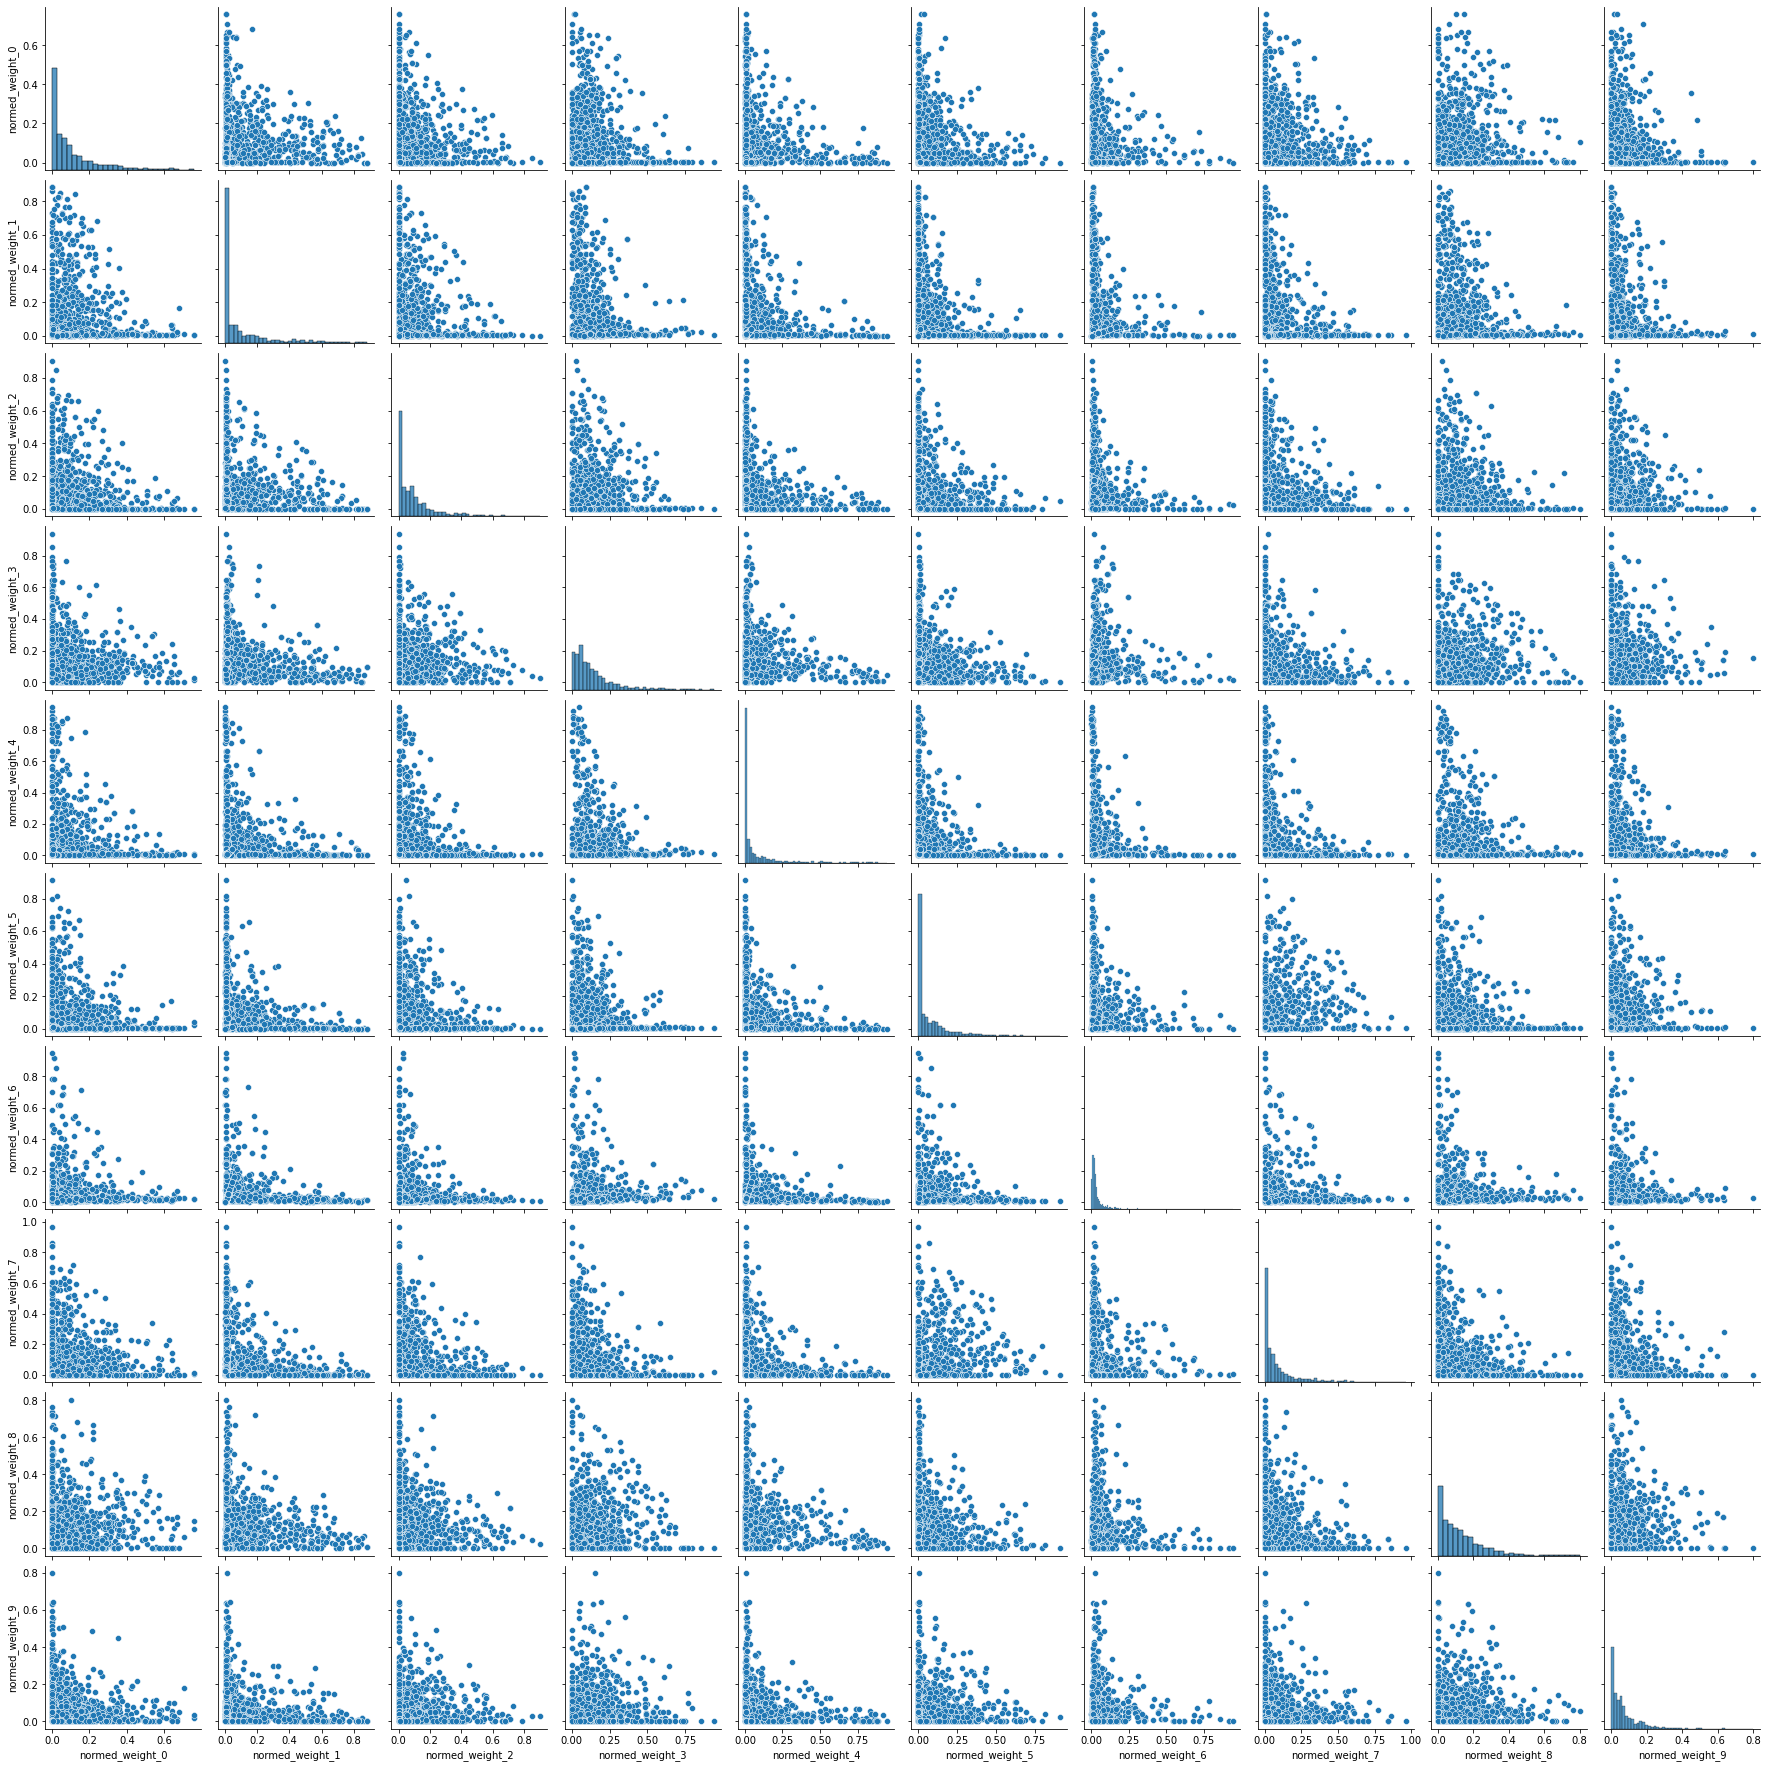

In [264]:
tags_frame=tag_level_data.tags_data
sns.pairplot(tags_frame[[f'normed_weight_{i}' for i in range(NR_TOPICS)]])

In [249]:
tags_frame=tag_level_data.tags_data
tags_frame.columns

Index(['total_cnt', 'total_weight_topic_0', 'total_weight_topic_1', 'total_weight_topic_2', 'total_weight_topic_3', 'total_weight_topic_4', 'total_weight_topic_5', 'total_weight_topic_6', 'total_weight_topic_7', 'total_weight_topic_8', 'total_weight_topic_9', 'tag', 'normed_weight_0',
       'normed_weight_1', 'normed_weight_2', 'normed_weight_3', 'normed_weight_4', 'normed_weight_5', 'normed_weight_6', 'normed_weight_7', 'normed_weight_8', 'normed_weight_9', 'weight_entropy', 'max_normed_topic_weight', 'dominant_normed_topic', 'score_0', 'score_1', 'score_2', 'score_3',
       'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9'],
      dtype='object')

!veraltet

In [209]:
@dataclass
class Link:
    content: str
    address: str
        

@dataclass
class LinkAnalysisResult:
    link_dict: DefaultDict[str, DefaultDict[str, float]]  = field(default_factory=lambda: defaultdict(lambda: defaultdict(lambda: 0.0)))
    link_to_hit_docs: DefaultDict[str, Set] = field(default_factory=lambda: defaultdict(set))
    link_to_linktype: Dict[str, str] = field(default_factory=dict)
    link_data_frame: pd.DataFrame = field(default_factory=pd.DataFrame)


def extr_links(txt):
    #soup = BeautifulSoup(f'<!DOCTYPE html><html><head></head><body>{txt}</body></html>', 'html.parser')
    soup = BeautifulSoup(txt)
    res = []
    for item in soup.find_all('a'):
        res.append(Link(item.get_text(), item.get('href', None)))
    return res
    
    
def make_list(item):
    if isinstance(item, list):
        ret=[]
        for strval in item:
            ret += extr_links(strval)
        return ret
    elif item is None or item == '':
        return []
    else:
        return extr_links(item)

    
def check_endswith(what: str, lst: List[str]):
    for item in lst:
        if what.endswith(item):
            return True
    else:
        return False
    

def get_tuple(key, value, link_to_linktype, link_to_hit_docs, nr_topics):
    lbl_lst = ['cnt_total', 'tot_quest_votes', 'tot_views', 'tot_answ_votes']
    ret_lst = [key] + [value[lbl] for lbl in lbl_lst] + [value[f'w_topic_{i}'] for i in range(nr_topics)] + [link_to_linktype[key], link_to_hit_docs[key]]
    return tuple(ret_lst)

    
def get_link_report(deps, base, step_3_label, nr_topics):
    link_dict = defaultdict(lambda: defaultdict(lambda: 0.0))
    link_to_hit_docs = defaultdict(set)
    link_to_linktype = dict()
    i=0
    IMG_END_LST = ['.gif', '.bmp', '.png', '.svg', '.jpg', '.tif', '.tiff', '.ico', '.jpeg']
    doc_iterator = data_access.get_doc_iterator(connection=deps.conn,
                                                d2es_obj=deps.d2es,
                                                step_label=step_3_label,
                                                format = 'all_#3',
                                                ml_tags=None
                    )
    for item in doc_iterator:
        i+=1   
        links = make_list(item.question_links) + make_list(item.comment_link_lst)
        for answ in item.answers:
            new_entries = make_list(answ.answer_links) + make_list(answ.comment_link_lst)
            for link in new_entries:
                la = link.address.lower()
                link_dict[la]['tot_answ_votes'] += answ.answer_vote or 0
            links += new_entries
        for link in links:
            la = link.address.lower()
            link_dict[la]['cnt_total'] += 1
            link_dict[la]['tot_quest_votes'] += base.iloc[item.ord_key,:].loc['votes'] or 0
            link_dict[la]['tot_views'] += base.iloc[item.ord_key,:].loc['views'] or 0  
            for i in range(nr_topics):
                link_dict[link.address.lower()][f'w_topic_{i}'] += base.iloc[item.ord_key,:].loc[f'w_topic_{i}']
            link_to_hit_docs[la].add(item.post_id)
            if check_endswith(la, IMG_END_LST):
                link_to_linktype[la] = 'img'
            elif la.startswith('/') or '/stackoverflow.com' in la:
                link_to_linktype[la] = 'internal'
            else:
                link_to_linktype[la] = 'std'   
                
    lbl_lst = ['address', 'count', 'question_votes_total', 'views_total', 'answers_votes_total'] + [f'w_topic_{i}' for i in range(nr_topics)] + ['link type', 'ref_post_ids']




    link_data = pd.DataFrame.from_records([get_tuple(key, value, link_to_linktype, link_to_hit_docs, nr_topics=nr_topics) 
                                           for key, value 
                                           in link_dict.items()], columns=lbl_lst)
    
    for int_lbl in ['count', 'question_votes_total', 'views_total', 'answers_votes_total']:
        link_data[int_lbl]=link_data[int_lbl].map(int)
                
    return LinkAnalysisResult(link_dict = link_dict,
                              link_to_hit_docs = link_to_hit_docs,
                              link_to_linktype = link_to_linktype,
                              link_data_frame = link_data.sort_values('count', ascending=False)
                              )

    

base = get_ext_post_meta_data(step_1_label=all_steps.loc['#1']['step_label'],
                              step_7_label=all_steps.loc['#7']['step_label'],
                              nr_topics=10)

link_report = get_link_report(deps, base, step_3_label=all_steps.loc['#3']['step_label'], nr_topics=10)


display(HTML('<h1>Anzahl der verschiedenen Links</h1>'))
print(len(link_report.link_dict)) 

7151


In [230]:
doc_iterator = data_access.get_doc_iterator(connection=deps.conn,
                                            d2es_obj=deps.d2es,
                                            step_label=all_steps.loc['#3']['step_label'],
                                            format = 'all_#3',
                                            ml_tags=None
)

link_dict = defaultdict(lambda: defaultdict(lambda: 0.0))
link_to_hit_docs = defaultdict(set)
link_to_linktype = dict()

@dataclass
class Link:
    content: str
    address: str


def extr_links(txt):
    #soup = BeautifulSoup(f'<!DOCTYPE html><html><head></head><body>{txt}</body></html>', 'html.parser')
    soup = BeautifulSoup(txt)
    res = []
    for item in soup.find_all('a'):
        res.append(Link(item.get_text(), item.get('href', None)))
    return res
    
def make_list(item):
    if isinstance(item, list):
        ret=[]
        for strval in item:
            ret += extr_links(strval)
        return ret
    elif item is None or item == '':
        return []
    else:
        return extr_links(item)

i=0
for item in doc_iterator:
    i+=1   
    links = make_list(item.question_links) + make_list(item.comment_link_lst)
    for answ in item.answers:
        links += make_list(answ.answer_links) + make_list(answ.comment_link_lst)
    for link in links:
        la = link.address.lower()
        link_dict[la]['cnt_total'] += 1
        for i in range(10):
            link_dict[la][f'w_topic_{i}'] += base.iloc[item.ord_key,:].loc[f'w_topic_{i}']
        link_to_hit_docs[la].add(item.post_id)
        if la.endswith('.gif') or la.endswith('.png') or la.endswith('.svg') or \
           la.endswith('.bmp') or la.endswith('.jpg') or la.endswith('.tif'):
            link_to_linktype[la] = 'img'
        elif la.startswith('/') or '/stackoverflow.com' in la:
            link_to_linktype[la] = 'internal'
        else:
            link_to_linktype[la] = 'std'          


for key in link_dict.keys():
    link_dict[key]['link_target']=key
    link_dict[key]['link_type']=link_to_linktype[key]
    link_dict[key]['doc_hits']=link_to_hit_docs[key]

    
link_data = pd.DataFrame.from_records([value
                                       for value 
                                       in link_dict.values()])

display(HTML('<h1>Link data</h1>'))
display(HTML('<h2>Number of links:</h2>'))
print(len(link_dict))     
display(HTML('<h2>Top link list:</h2>'))
display(link_data.sort_values('cnt_total', ascending=False).head())
display(HTML('<h2>Without images and internal links:</h2>'))
display(link_data[link_data['link_type']=='std'].sort_values('cnt_total', ascending=False).head())


7151


cnt_total  w_topic_0  w_topic_1  w_topic_2  w_topic_3  ...  w_topic_8  w_topic_9                                        link_target  link_type                                           doc_hits
10        112.0  11.279879   0.478077   5.577403  30.064698  ...  26.708014  15.053843                             /help/closed-questions   internal  {14637587, 60167189, 36563989, 20011041, 58091...
862       104.0   7.768096   1.270977   4.528452  28.379702  ...  30.191297  18.753194  https://rads.stackoverflow.com/amzn/click/com/...        std  {7309318, 9498637, 14637587, 19935773, 7987230...
695        68.0   7.885200   0.346225   3.297942  16.011128  ...  14.302719  11.688198       http://dddcommunity.org/library/vernon_2011/        std  {17595521, 24144005, 27039878, 55682695, 32702...
992        61.0   5.041543   0.642671   2.386074  17.100770  ...  16.561523   9.943145  http://jeffreypalermo.com/blog/the-onion-archi...        std  {42024193, 39170691, 24232068, 20249864, 38900...
1593       61.0   6.740480   0.464664   2.739698  15.107737  ...  17.479558  12.115828  http://www.udidahan.com/2009/06/14/domain-even...        std  {18886147, 4569475, 13340804, 9922697, 1547751...

[5 rows x 14 columns]

cnt_total  w_topic_0  w_topic_1  w_topic_2  w_topic_3  ...  w_topic_8  w_topic_9                                        link_target  link_type                                           doc_hits
862       104.0   7.768096   1.270977   4.528452  28.379702  ...  30.191297  18.753194  https://rads.stackoverflow.com/amzn/click/com/...        std  {7309318, 9498637, 14637587, 19935773, 7987230...
695        68.0   7.885200   0.346225   3.297942  16.011128  ...  14.302719  11.688198       http://dddcommunity.org/library/vernon_2011/        std  {17595521, 24144005, 27039878, 55682695, 32702...
992        61.0   5.041543   0.642671   2.386074  17.100770  ...  16.561523   9.943145  http://jeffreypalermo.com/blog/the-onion-archi...        std  {42024193, 39170691, 24232068, 20249864, 38900...
1593       61.0   6.740480   0.464664   2.739698  15.107737  ...  17.479558  12.115828  http://www.udidahan.com/2009/06/14/domain-even...        std  {18886147, 4569475, 13340804, 9922697, 1547751...
1118       42.0   3.486428   0.425535   3.163301   9.993325  ...  11.867843   8.423869            http://martinfowler.com/bliki/cqrs.html        std  {20904065, 12775554, 13647490, 13778312, 38801...

[5 rows x 14 columns]

# Export in csv und xls

In [228]:
# raise NotImplementedError()
base.to_csv(os.path.join(BASE_OUTPUT, 'ddd_meta_data.csv'), sep=';')
link_data.to_csv(os.path.join(BASE_OUTPUT, 'ddd_link_infos.csv'), sep=';')
base.to_excel(os.path.join(BASE_OUTPUT, 'ddd_meta_data.xlsx'))
link_data.to_excel(os.path.join(BASE_OUTPUT, 'ddd_link_infos.xlsx'))

# Link Verteilung

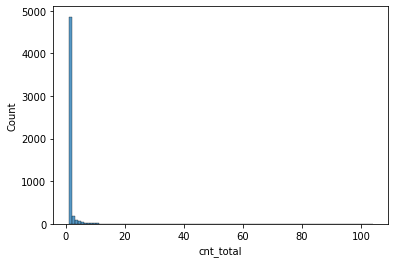

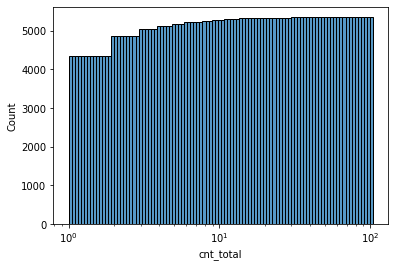

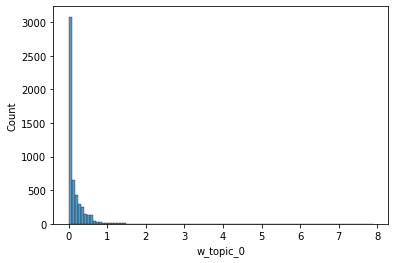

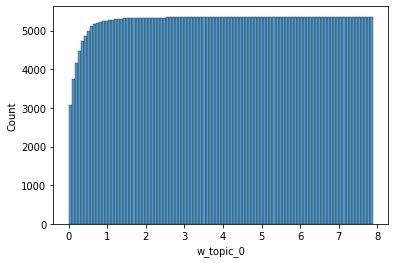

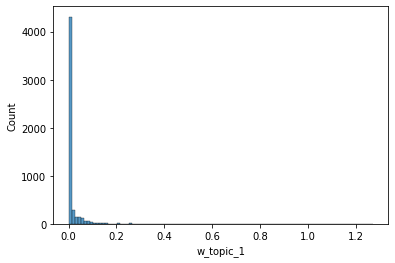

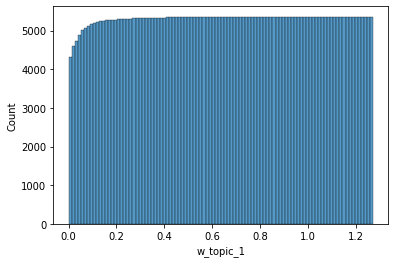

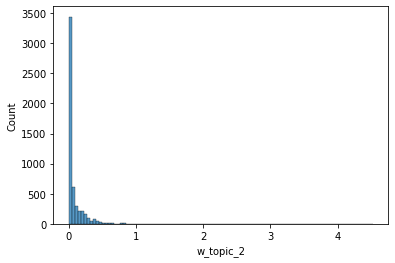

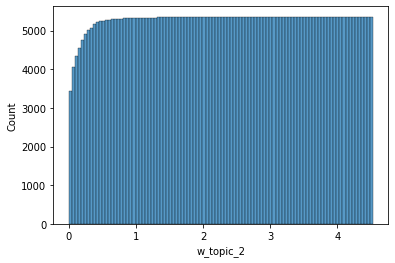

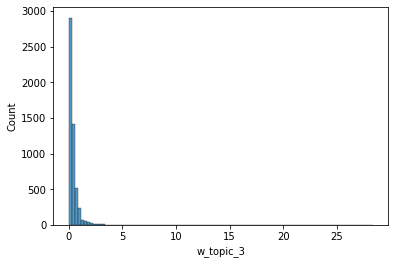

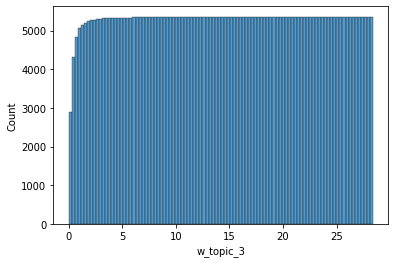

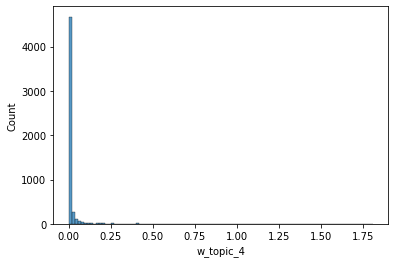

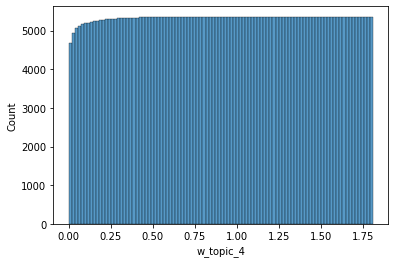

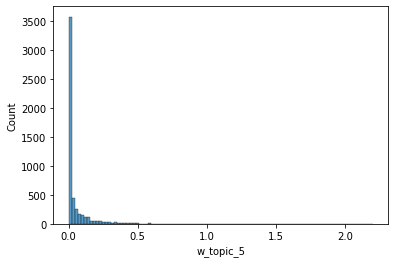

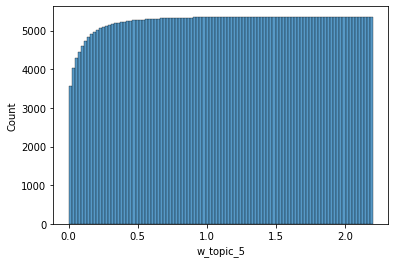

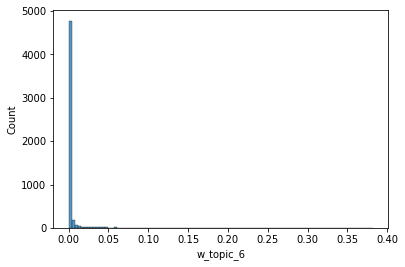

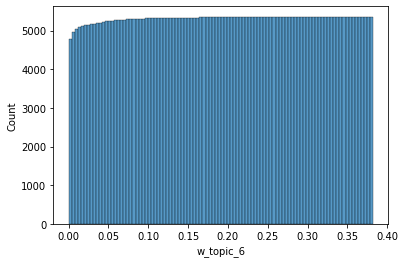

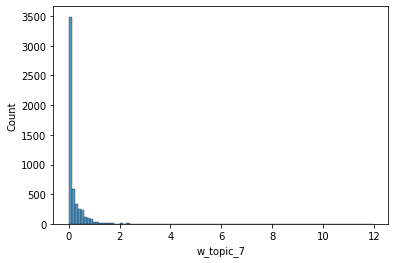

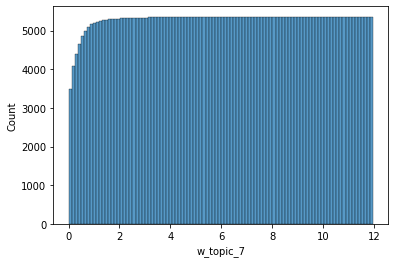

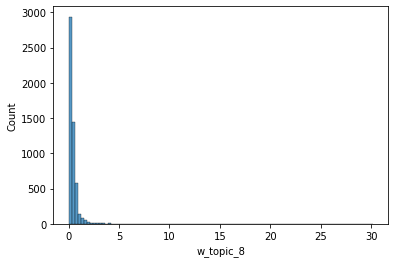

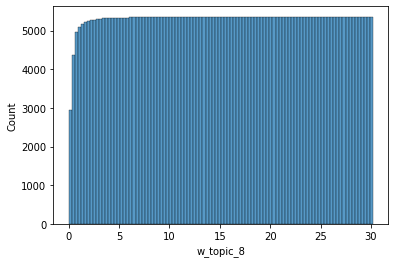

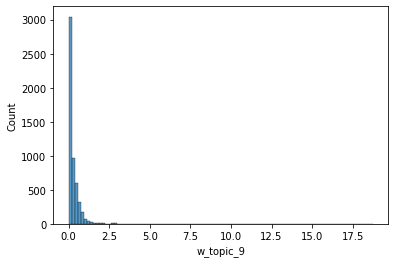

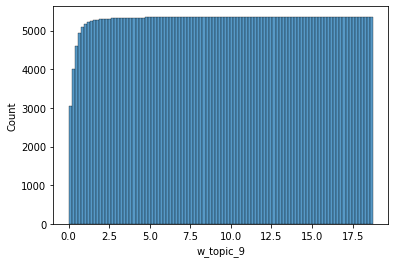

In [267]:
rel_data = link_data[link_data['link_type']=='std']['cnt_total']
display(HTML('<h1>Histogram</h1>'))
sns.histplot(rel_data, bins=100, cumulative=False, log_scale=False)
plt.show()
display(HTML('<h1>Histogram - cumulative</h1>'))
sns.histplot(rel_data, bins=100, cumulative=True,  log_scale=True)
plt.show()
print()
print()
display(HTML('<h1>Histogram of Number weighted by topic weights</h1>'))
for topic in range(10):
    rel_data_2 = link_data[link_data['link_type']=='std'][f'w_topic_{topic}']
    display(HTML(f'<h2>Histogram topic [{topic}]</h2>'))
    sns.histplot(rel_data_2, bins=100, cumulative=False, log_scale=False)
    plt.show()
    display(HTML(f'<h2>Histogram topic [{topic}] - cumulative</h2>'))
    sns.histplot(rel_data_2, bins=100, cumulative=True, log_scale=False)
    plt.show()

# Temportal post Distribution

In [235]:
base_filtered = base[base['asked_date'].map(lambda x: isinstance(x, type(date.today())))]

In [236]:
bin_nr = 40

time_delta = (base_filtered['asked_date'].max()-base_filtered['asked_date'].min())/bin_nr

bins = [base_filtered['asked_date'].min()+i*time_delta for i in range(bin_nr+1)]

In [237]:
def get_bin(value):
    for i in range(bin_nr):
        if bins[i] < value and value<= bins[i+1]:
            return f'[{i+1}] {bins[i]}-{bins[i+1]}'
    else:
        return f'[{0}] <={bins[0]}'
    
base_filtered['date_nr_bins'] = base_filtered['asked_date'].map(get_bin)

gr_data = base_filtered.groupby('date_nr_bins')['step'].count()
gr_data_weights = base_filtered.groupby('date_nr_bins')[[f'w_topic_{topic}' for topic in range(10)]].sum()
topics_wighted_by_total_weight = gr_data_weights.div(gr_data_weights.sum(axis=1),axis=0)

<AxesSubplot:xlabel='date_nr_bins'>

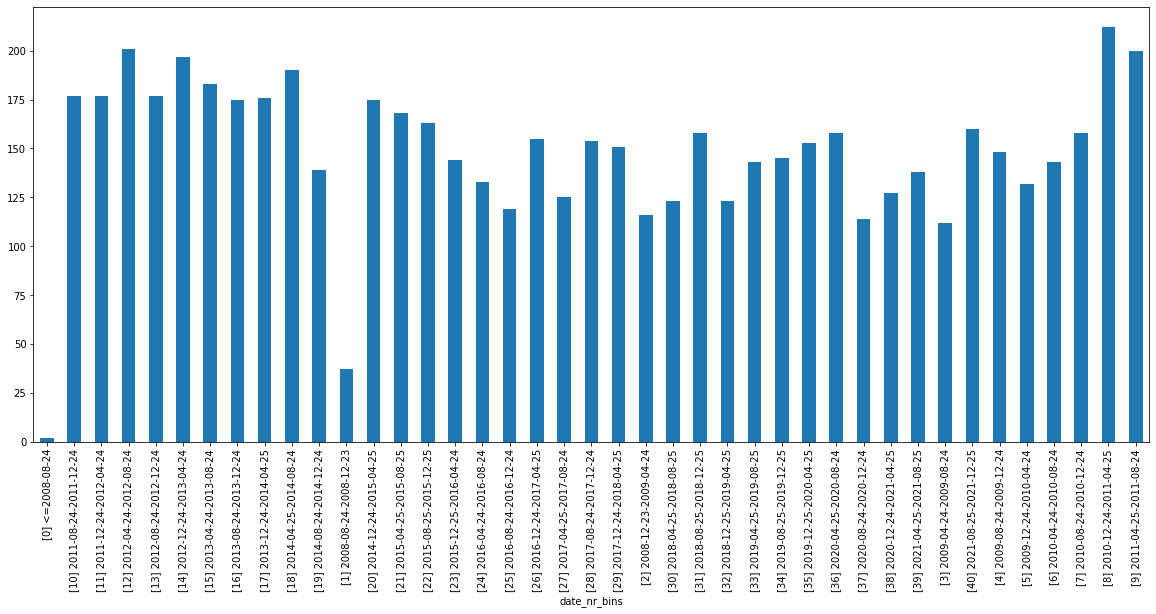

In [238]:
display(HTML(f'<h1>number of post for time intervals (len: {time_delta.days} days)</h1>'))
gr_data.plot(kind='bar', figsize=(20, 8))

<AxesSubplot:xlabel='date_nr_bins'>

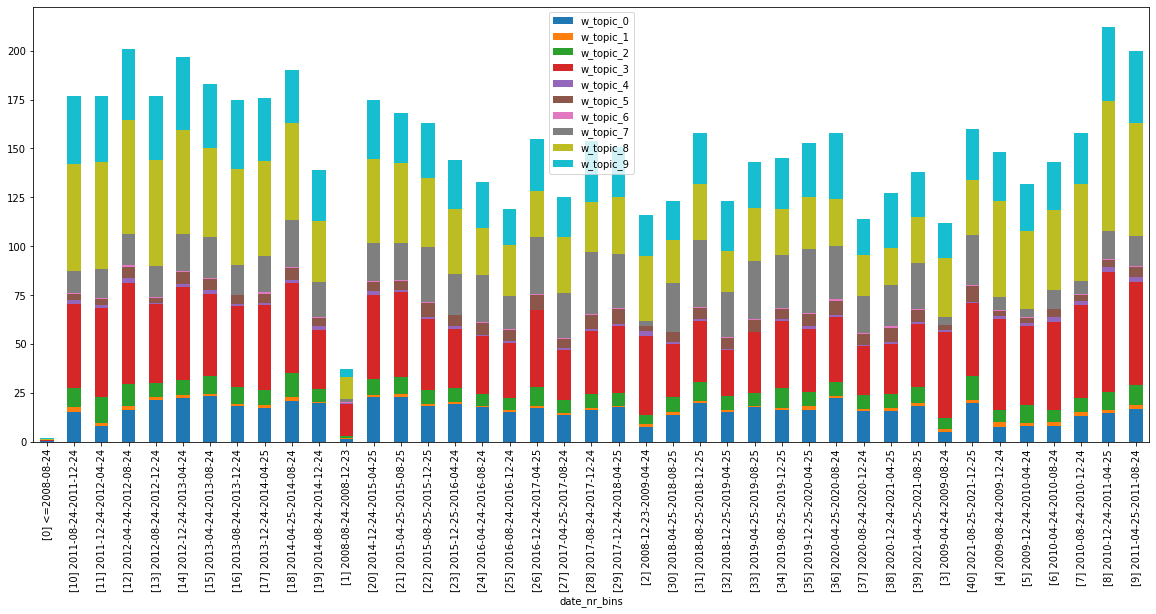

In [239]:
display(HTML('<h1>sum of number of posts weighted by topic weights</h1>'))
gr_data_weights.plot(kind='bar', stacked=True, figsize=(20, 8))

<AxesSubplot:xlabel='date_nr_bins'>

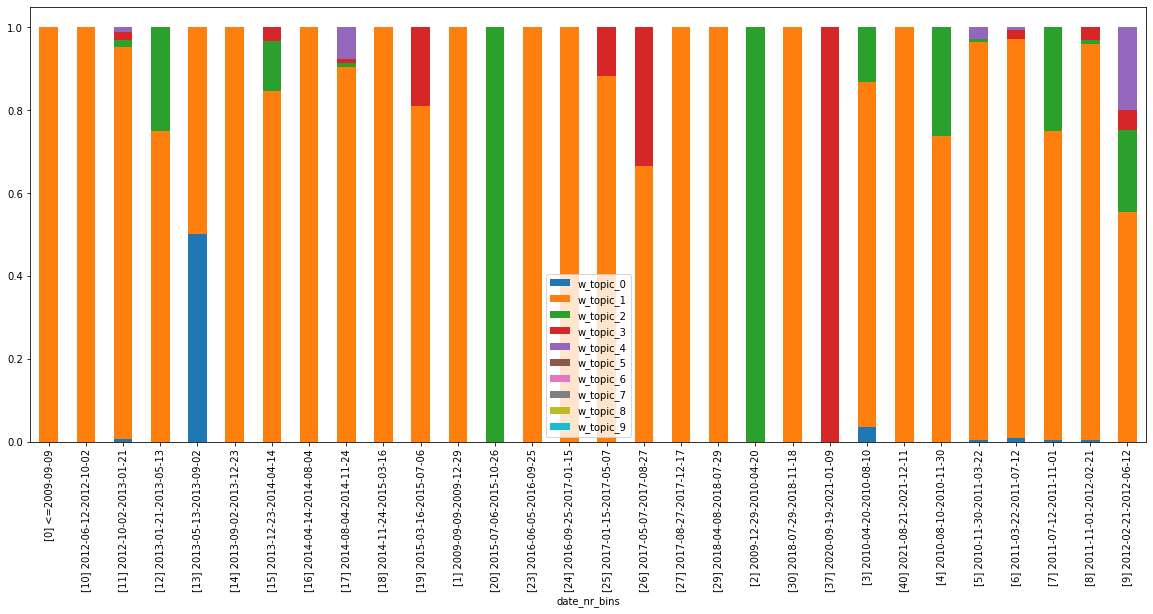

In [35]:
display(HTML('<h1>sum of number of posts weighted by topic weights / normalized</h1>'))
topics_wighted_by_total_weight.plot(kind='bar', stacked=True, figsize=(20, 8))